# 1. Importing Libraries

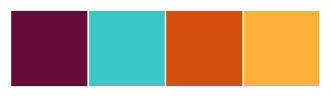

In [2]:
import numpy as np
from numpy import cos, sin, arcsin, sqrt
import pandas as pd
import math
from math import radians
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram

import plotly.express as px

import keras
from keras.layers import Dense,Dropout

import pandas as pd
from tensorflow.keras.models import Sequential
from sklearn import metrics
import tensorflow as tf
import keras.backend as K

import joblib
import time
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = (20, 10)

#define a custom palette
customPalette = ['#630C3A','#39C8C6','#D3500C','#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 70D6-B03A

 Directory of C:\Users\MWAMBA\Clustering_HO

04/26/2023  04:40 PM    <DIR>          .
04/26/2023  04:40 PM    <DIR>          ..
02/10/2023  07:57 PM    <DIR>          .ipynb_checkpoints
02/08/2023  06:41 PM           427,518 2021_FEBRUARY.csv
01/11/2023  04:45 PM        25,937,760 Candidate_Cell.csv
03/29/2023  06:02 PM         1,763,549 Clustering.ipynb
02/14/2023  05:46 PM            10,186 CorrelationMatrix.png
02/14/2023  05:46 PM           106,346 Feature_Importance.jpeg
02/14/2023  05:46 PM            53,468 Feature_Importance.png
02/14/2023  05:46 PM           294,346 Figure_12.jpeg
02/14/2023  05:48 PM            23,545 Figure_14_Acc.jpeg
02/14/2023  05:48 PM            31,020 Figure_14_Acc.png
02/14/2023  05:48 PM            21,913 Figure_14_Loss.jpeg
02/14/2023  05:48 PM            26,496 Figure_14_Loss.png
02/14/2023  05:46 PM           277,282 Figure_3.jpeg
02/14/2023  05:46 PM           246,942 Figure_4.j

In [4]:
# Loading UE Data
Satellite_data = pd.read_csv('LEO1_LLA_Position.csv')
Satellite_data.head()

,Time,Lat (deg),Lon (deg),Alt (km),speed (km/sec)
0,0,0.127,-116.637,300.000104,7.56
1,1,0.159,-116.583,300.000163,7.56
2,2,0.191,-116.529,300.000235,7.56
3,3,0.223,-116.475,300.000320,7.56
4,4,0.254,-116.421,300.000418,7.56


# 2. Loading The Data

In [5]:
pd.set_option('display.max_columns', None)
# Loading UE Data
UE_data = pd.read_csv('NTN_Dataset.csv')
UE_data.head()

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412


In [6]:
UE_data.shape

(377454, 20)

In [7]:
#UE_data = UE_data.loc[UE_data['Time'] > 0]

In [8]:
 UE_data = UE_data.loc[UE_data['Index'].unique()]

In [9]:
UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62904,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62905,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62906,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62907,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62904,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62905,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62906,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62907,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
 UE_data['Time'].max()

97.5976955

In [12]:
 UE_data['Time'].min()

0.0

In [13]:
UE_data['Index'].unique()

array([    0,     1,     2, ..., 10482, 10483, 10484], dtype=int64)

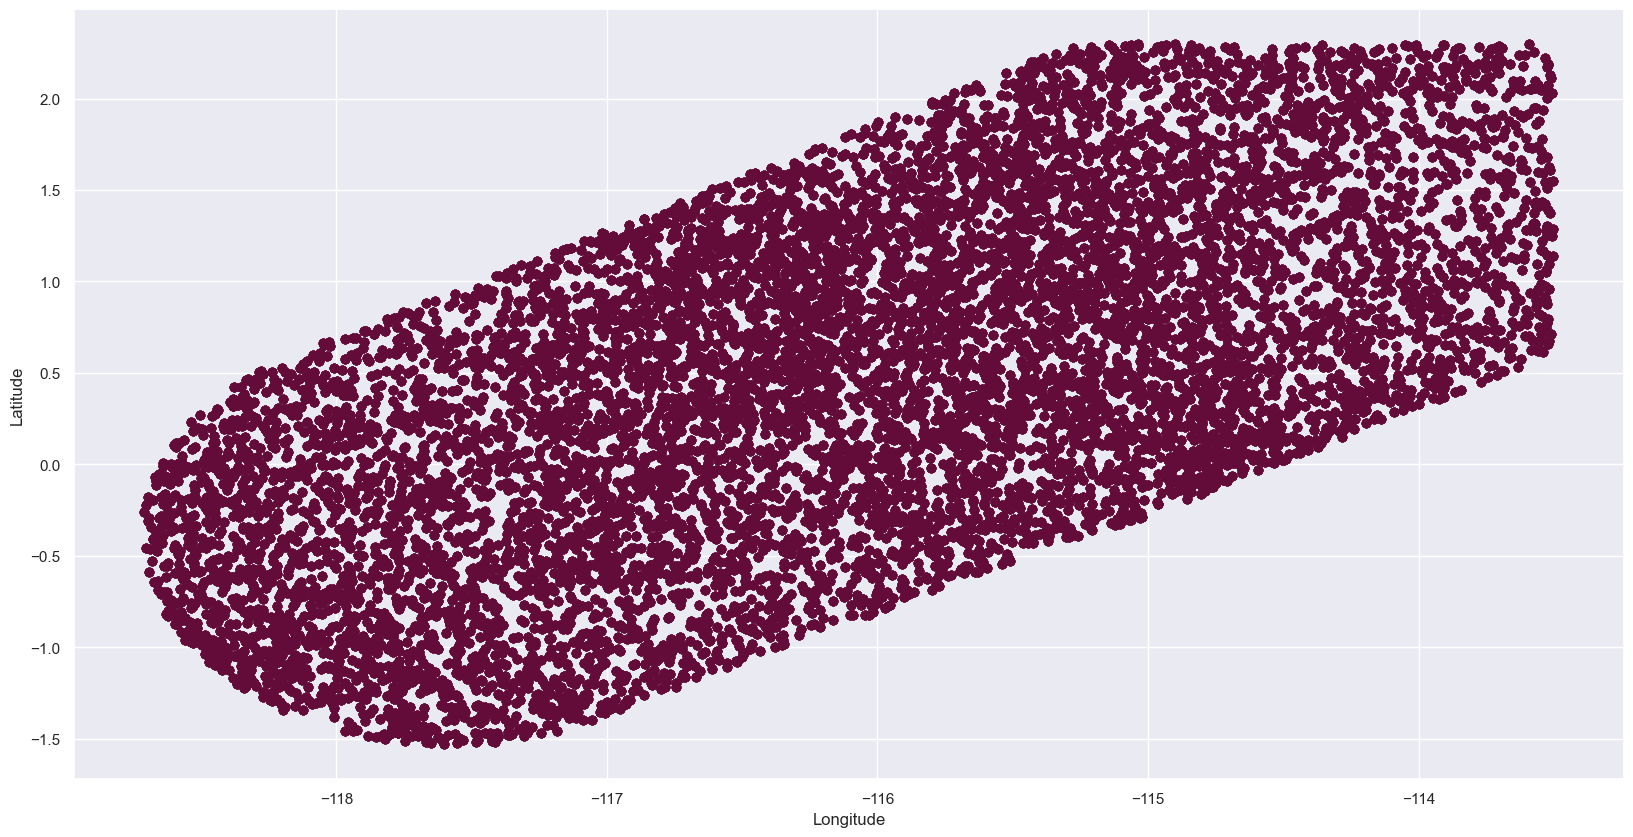

In [14]:
plt.scatter(UE_data['Longitude'], UE_data['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Figure_All_users.jpeg')

# Find the best number of Cluster for our data with Elbow Technique

In [15]:
wcss = []

for i in range(1, 10):
    kmeans= KMeans(i)
    kmeans.fit(UE_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

wcss

[581103264166.607,
 148872414558.5267,
 68829911353.80542,
 40816464130.4806,
 27851065533.653675,
 20803091517.99883,
 16559835506.515427,
 13800505605.62143,
 11910851905.179691]

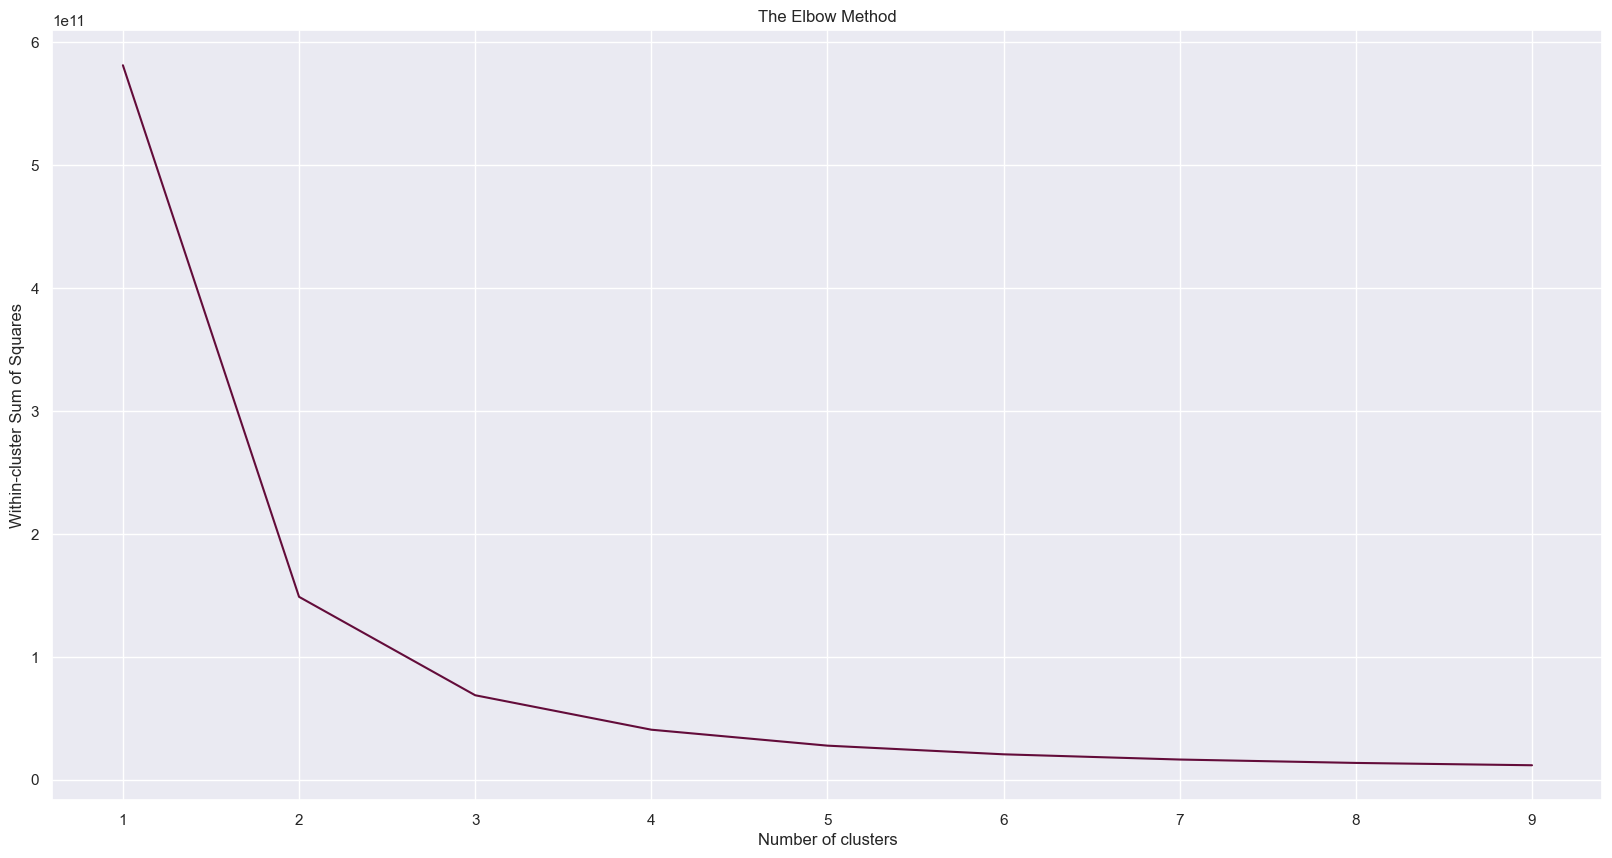

In [16]:
number_clusters = range(1, 10)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.savefig('plot_MW_vs_LogP.jpeg')

# 3. Select Features

# 3.2. Create Clustering Algorithm

# 1st Method

Grouping Data point on the basis of similarity : CellType, Latitude and Longitude

In [17]:
# Select some feature
x = UE_data.iloc[:, 1:4]
x

,CellType,Latitude,Longitude
0,0,0.2928,-115.8555
1,0,0.2928,-115.8555
2,1,0.2928,-115.8555
3,1,0.2928,-115.8555
4,2,0.2928,-115.8555
...,...,...,...
62904,0,-1.1051,-118.0414
62905,0,-1.1051,-118.0414
62906,1,-1.1051,-118.0414
62907,1,-1.1051,-118.0414


In [18]:
# Clustering
kmeans = KMeans(3)

In [19]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [20]:
# Clustering resuts
identified_clusaters = kmeans.fit_predict(x)
identified_clusaters 

array([1, 1, 1, ..., 0, 0, 0])

In [21]:
data_with_clusters = UE_data.copy()
data_with_clusters['Cluster'] = identified_clusaters
data_with_clusters

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,Cluster
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,1
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,1
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,1
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,1
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62904,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
62905,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
62906,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
62907,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


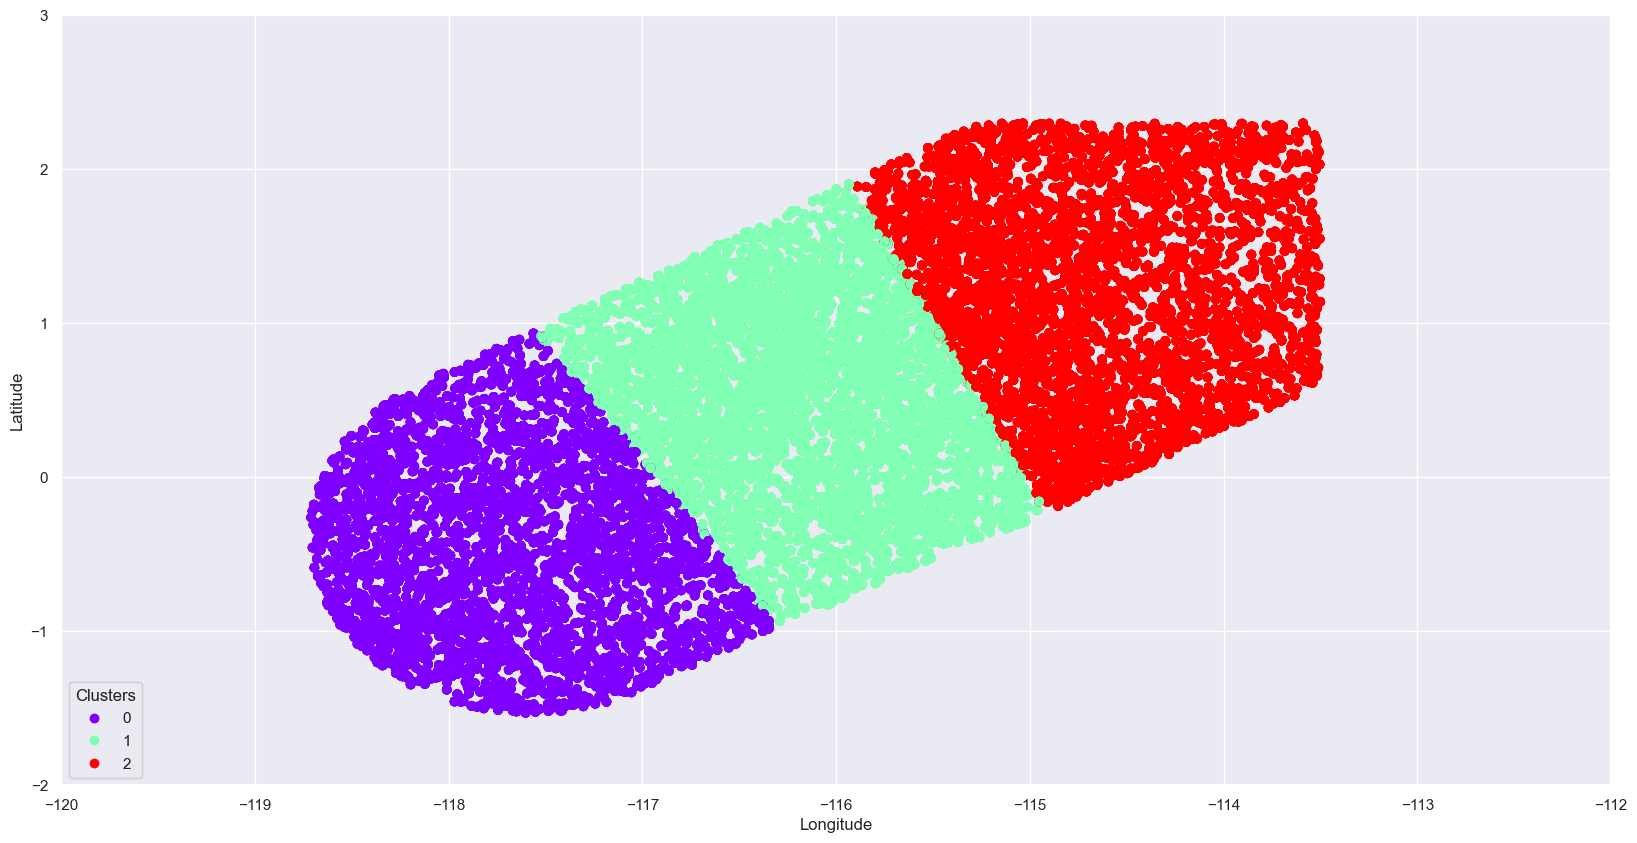

In [22]:
fig, ax = plt.subplots()
scatter = ax.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), loc='lower left', title='Clusters')
ax.add_artist(legend1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Figure_4.jpeg')
plt.xlim(-120, -112)
plt.ylim(-2,3)
plt.show()

# 2nd Method

In [23]:
# Select some feature
sample_data = UE_data.iloc[0:20000,0:4]
sample_data

,Index,CellType,Latitude,Longitude
0,0,0,0.2928,-115.8555
1,0,0,0.2928,-115.8555
2,0,1,0.2928,-115.8555
3,0,1,0.2928,-115.8555
4,0,2,0.2928,-115.8555
...,...,...,...,...
19995,3332,1,-0.3633,-116.6210
19996,3332,2,-0.3633,-116.6210
19997,3332,2,-0.3633,-116.6210
19998,3333,0,-0.3033,-115.6614


Text(0, 0.5, 'Latitude')

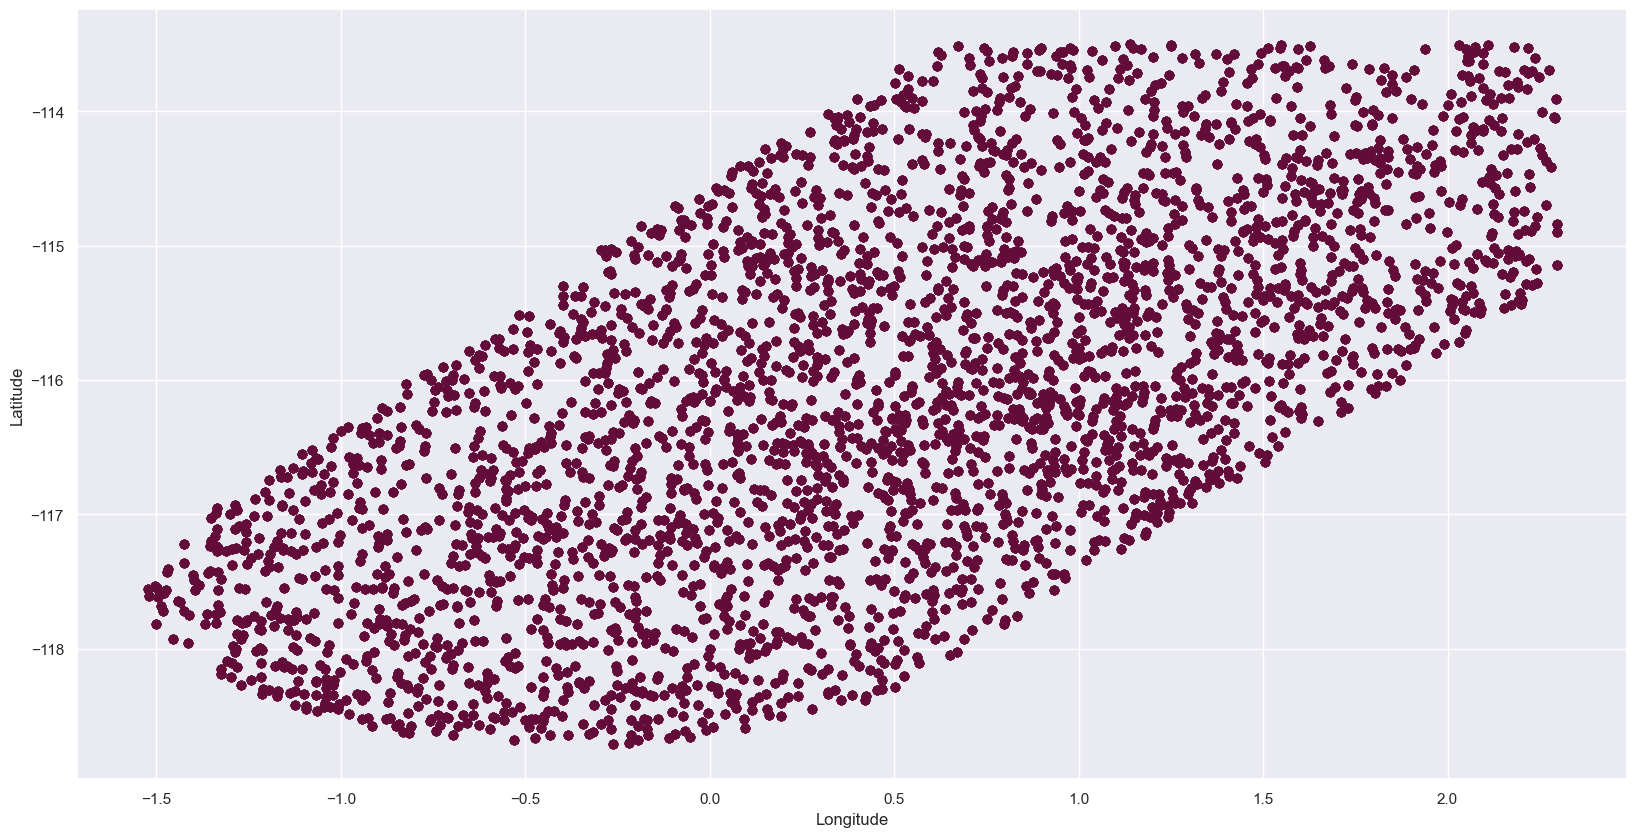

In [24]:
plt.scatter(sample_data['Latitude'], sample_data['Longitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [25]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [26]:
y_predicted = km.fit_predict(sample_data[['Latitude','Longitude']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
sample_data['cluster'] = y_predicted
sample_data.head()

,Index,CellType,Latitude,Longitude,cluster
0,0,0,0.2928,-115.8555,0
1,0,0,0.2928,-115.8555,0
2,0,1,0.2928,-115.8555,0
3,0,1,0.2928,-115.8555,0
4,0,2,0.2928,-115.8555,0


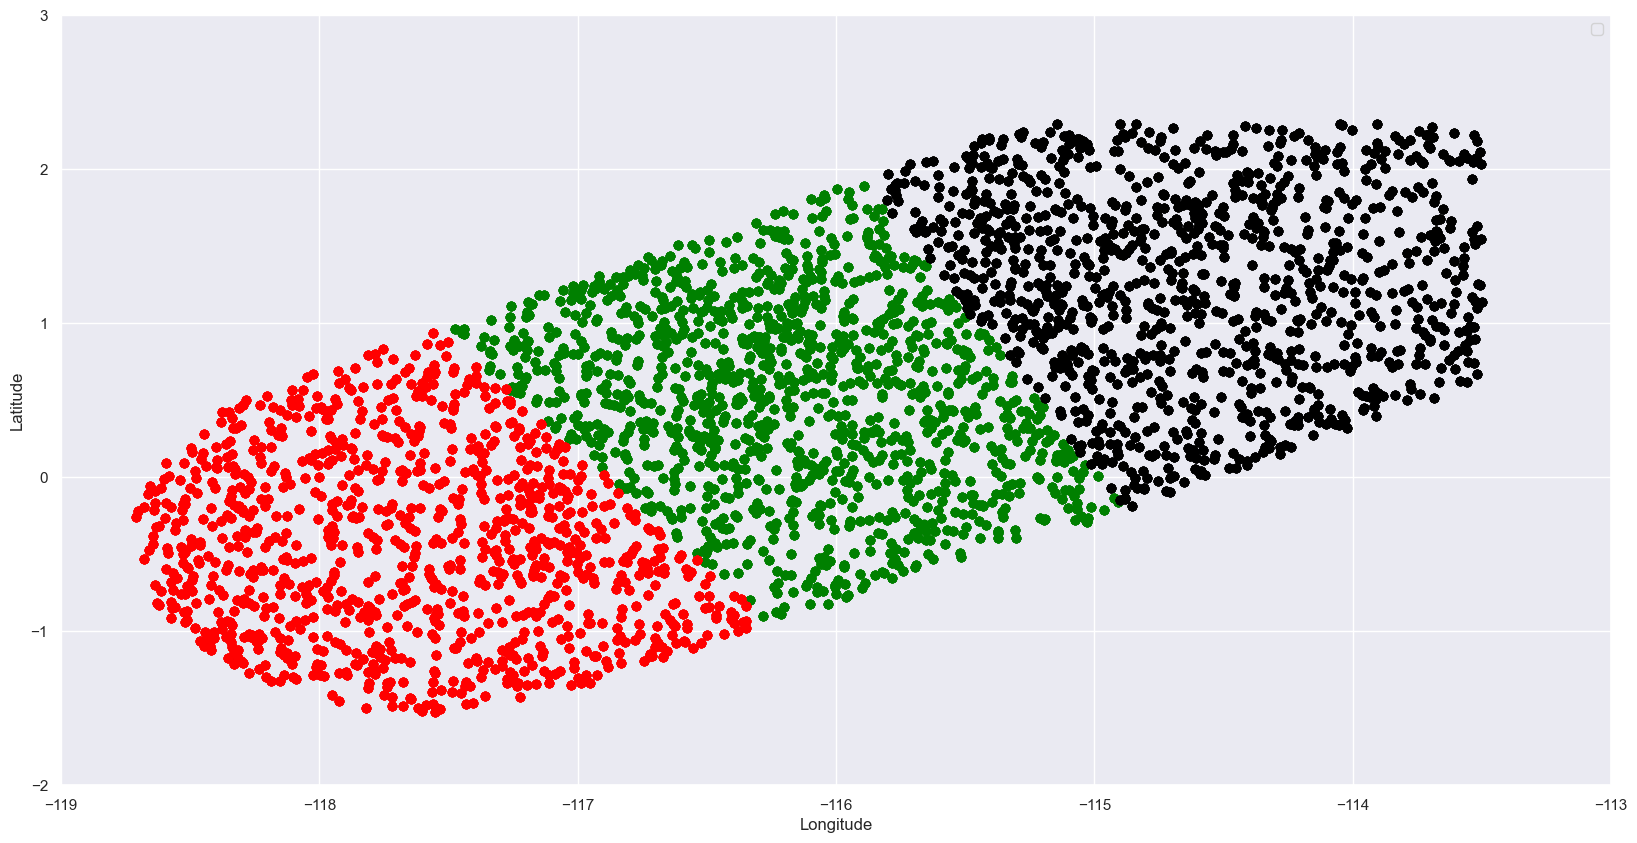

In [28]:
cluster_1 = sample_data[sample_data.cluster == 0]
cluster_2 = sample_data[sample_data.cluster == 1]
cluster_3 = sample_data[sample_data.cluster == 2]

plt.scatter(cluster_1.Longitude, cluster_1['Latitude'], color='green')
plt.scatter(cluster_2.Longitude, cluster_2['Latitude'], color='red')
plt.scatter(cluster_3.Longitude, cluster_3['Latitude'], color='black')
plt.savefig('Figure_5.jpeg')
plt.xlim(-119, -113)
plt.ylim(-2,3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend("")

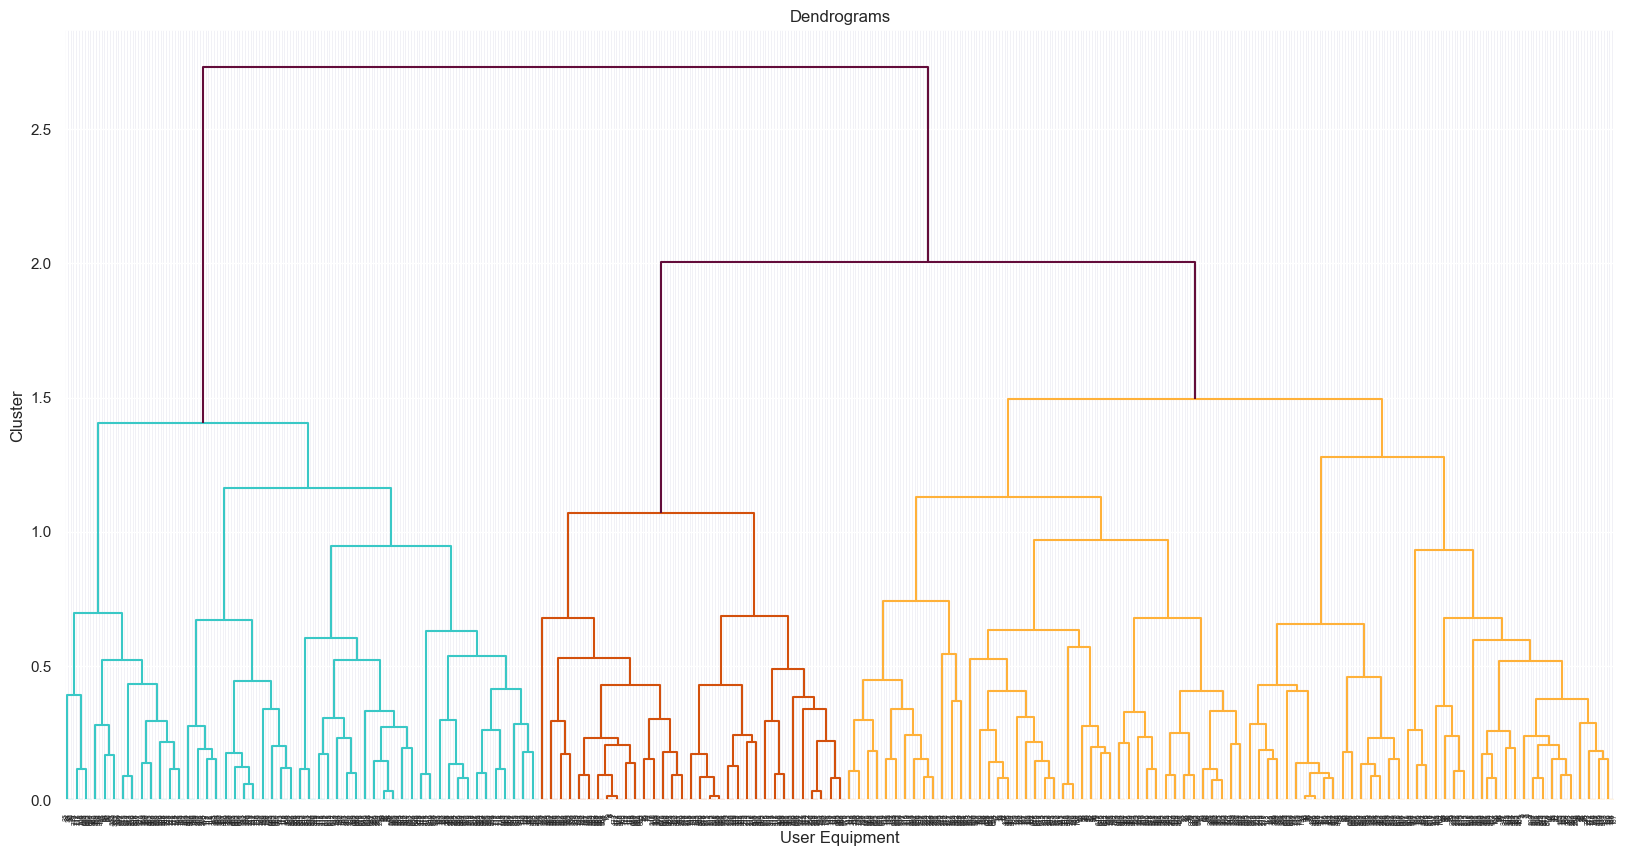

In [29]:
# Select some feature
dendogram_data = UE_data.iloc[0:999,0:4]


Z = hierarchy.linkage(dendogram_data[['Latitude','Longitude']], method='average')
  
plt.figure()
plt.ylabel('Cluster')
plt.xlabel('User Equipment')
plt.title("Dendrograms")
plt.savefig('Figure_6.jpeg')
  
# Dendrogram plotting using linkage matrix
dendrogram = hierarchy.dendrogram(Z)

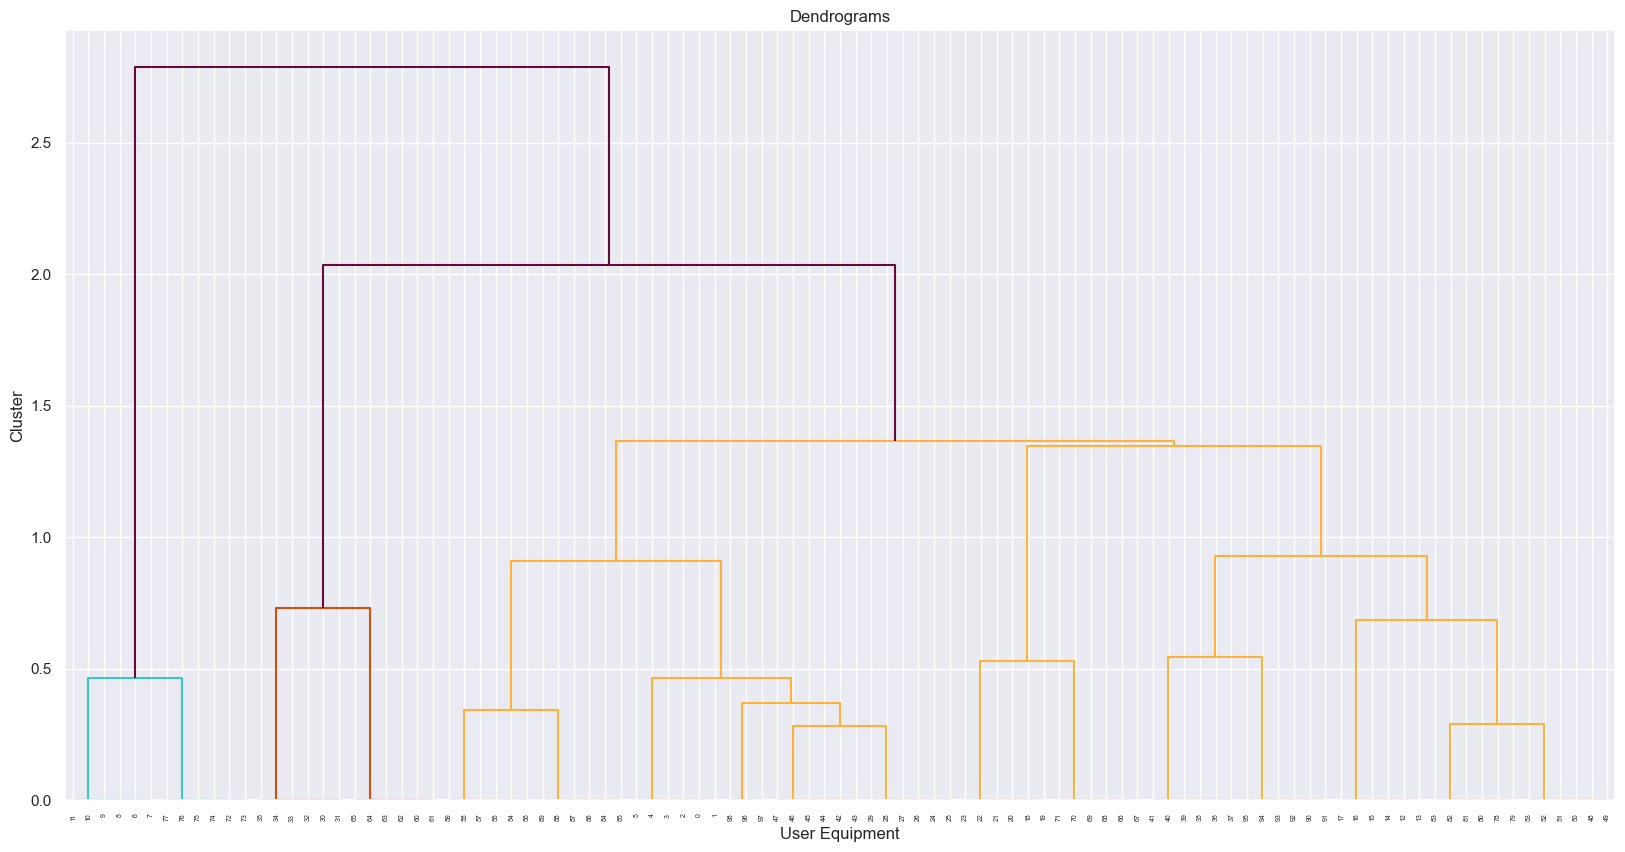

In [30]:
# Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
max_d = 5

# Select some feature
dendogram_data = UE_data.iloc[0:99,0:4]
  
Z = hierarchy.linkage(dendogram_data[['Latitude','Longitude']], method='average')
plt.figure()
plt.title("Dendrograms")
plt.ylabel('Cluster')
plt.xlabel('User Equipment')
dendrogram = hierarchy.dendrogram(Z)
  
# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')

# 4.  Centroids

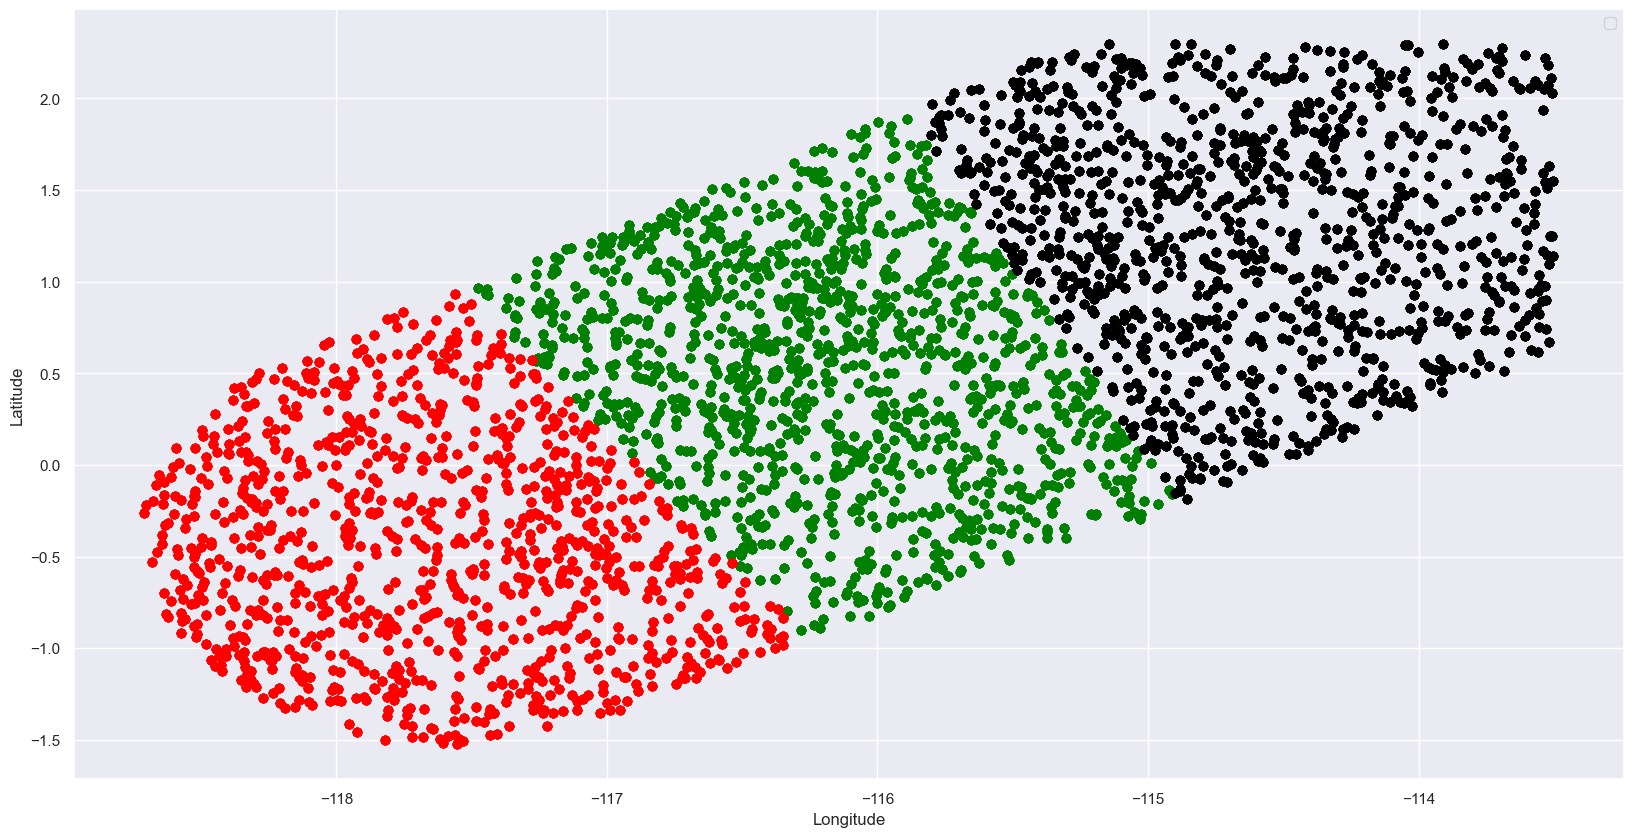

In [31]:
cluster_1 = sample_data[sample_data.cluster == 0]
cluster_2 = sample_data[sample_data.cluster == 1]
cluster_3 = sample_data[sample_data.cluster == 2]

plt.scatter(cluster_1.Longitude, cluster_1['Latitude'], color='green') # Target Cell
plt.scatter(cluster_2.Longitude, cluster_2['Latitude'], color='red') # Serving Cell
plt.scatter(cluster_3.Longitude, cluster_3['Latitude'], color='black') # Candidate Cell
plt.savefig('Figure_12.jpeg')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend("")

In [32]:
sample_data.shape

(20000, 5)

Centreoid for each cluster

In [33]:
km.cluster_centers_

array([[   0.5192351 , -116.17535755],
       [  -0.45426507, -117.63794374],
       [   1.2520443 , -114.62504853]])

In [34]:
# Center point for the 1st Cluster : Serving Cell
km.cluster_centers_[0:1]

array([[   0.5192351 , -116.17535755]])

In [35]:
centroid_1 = km.cluster_centers_[0:1]
centroid_1_Lat = centroid_1[0][0]
centroid_1_Lon = centroid_1[0][1]
print("Centroid of cluster 1: ", centroid_1_Lat, centroid_1_Lon)

Centroid of cluster 1:  0.5192350953678474 -116.17535754768393


In [36]:
# Center point for the 2nd Cluster : Target Cell
km.cluster_centers_[1:2]

array([[  -0.45426507, -117.63794374]])

In [37]:
centroid_2 = km.cluster_centers_[1:2]
centroid_2_Lat = centroid_2[0][0]
centroid_2_Lon = centroid_2[0][1]
print("Centroid of cluster 2: ", centroid_2_Lat, centroid_2_Lon)

Centroid of cluster 2:  -0.45426506849315057 -117.63794373776908


In [38]:
# Center point for the 3rd Cluster : Candidate Cel
km.cluster_centers_[2:3]

array([[   1.2520443 , -114.62504853]])

In [39]:
centroid_3 = km.cluster_centers_[2:3]
centroid_3_Lat = centroid_3[0][0]
centroid_3_Lon = centroid_3[0][1]
print("Centroid of cluster 3: ", centroid_3_Lat, centroid_3_Lon)

Centroid of cluster 3:  1.2520443014705878 -114.62504852941177


In [40]:
#sample_data['cluster'] = sample_data['cluster'].replace(0, 'cluster_1')
#sample_data['cluster'] = sample_data['cluster'].replace(1, 'cluster_2')
#sample_data['cluster'] = sample_data['cluster'].replace(2, 'cluster_3')

In [41]:
sample_data

,Index,CellType,Latitude,Longitude,cluster
0,0,0,0.2928,-115.8555,0
1,0,0,0.2928,-115.8555,0
2,0,1,0.2928,-115.8555,0
3,0,1,0.2928,-115.8555,0
4,0,2,0.2928,-115.8555,0
...,...,...,...,...,...
19995,3332,1,-0.3633,-116.6210,0
19996,3332,2,-0.3633,-116.6210,0
19997,3332,2,-0.3633,-116.6210,0
19998,3333,0,-0.3033,-115.6614,0


# Data by Cell Type

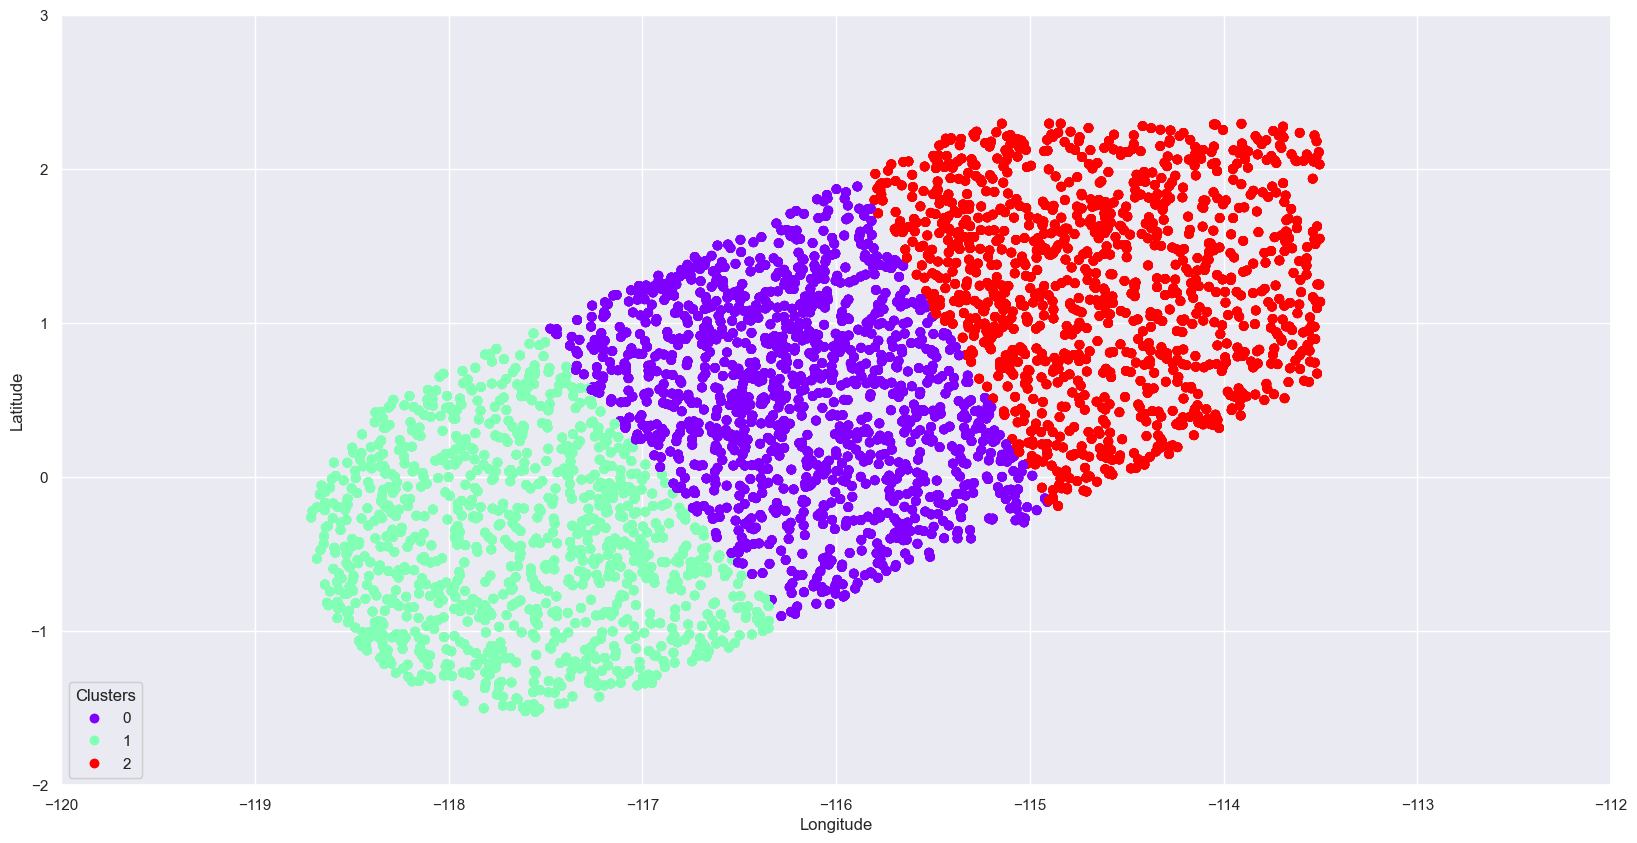

In [42]:
fig, ax = plt.subplots()
scatter = ax.scatter(sample_data['Longitude'],sample_data['Latitude'], c=sample_data['cluster'], cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(), loc='lower left', title='Clusters')
ax.add_artist(legend1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Figure_4.jpeg')
plt.xlim(-120, -112)
plt.ylim(-2,3)
plt.show()

In [43]:
Target_Cell = UE_data.loc[UE_data['CellType'] == 1]
Serving_Cell = UE_data.loc[UE_data['CellType'] == 0]
Candidate_Cell = UE_data.loc[UE_data['CellType'] == 2]

# Candidate_Cell

In [44]:
Candidate_Cell['Latitude'].min()

-1.53

In [45]:
Candidate_Cell['Latitude'].max()

2.2975

In [46]:
Candidate_Cell['Latitude'].mean()

0.4421494921073967

In [47]:
Candidate_Cell['Latitude'].median()

0.4458

Calculate the distance between two UE (lat, lon) based on Haversine Formula

In [48]:
def haversine(lat_centroid, lon_centroid, lat_UE, lon_UE):
    
    # distance between latitudes and longitudes
    dLat = (lat_UE - lat_centroid) * math.pi / 180.0
    dLon = (lon_UE - lon_centroid) * math.pi / 180.0
    
    # Convert to radians
    lat_centroid = (lat_centroid) * math.pi / 180.0
    lat_UE = (lat_UE) * math.pi / 180.0
    
    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) + pow(math.sin(dLon / 2), 2) * math.cos(lat_centroid) * math.cos(lat_UE))
    radius = 6371 # Earth Radius
    c = 2 * math.asin(math.sqrt(a))
    
    return radius * c

lat_centroid = 51.5007
lon_centroid = 0.1246
lat_UE = 40.6892
lon_UE = 74.0445

print(haversine(lat_centroid, lon_centroid, lat_UE, lon_UE), "KM")

5574.840456848555 KM


In [49]:
Candidate_Cell.head(3)

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412
5,0,2,0.2928,-115.8555,48.791738,164.164691,-66.270079,330.029127,167.580390,167.580390,-137.580390,-137.580390,-92.897345,20,51.018749,35.967249,38.977549,0.001314,393.787877,-167.948845
10,1,2,-0.8417,-118.5595,0.000000,183.799629,-68.340436,325.295104,167.435246,167.435246,-137.435246,-137.435246,-92.752201,20,51.163893,36.112393,39.122693,0.001292,387.262225,-167.803701


In [50]:
# Candidate centroid =    centroid_3_Lat, centroid_3_Lon
lat_centroid = centroid_3_Lat
lon_centroid = centroid_3_Lon

def haversine(lat_centroid, lon_centroid, lat_UE, lon_UE):
    
    # distance between latitudes and longitudes
    dLat = (lat_UE - lat_centroid) * math.pi / 180.0
    dLon = (lon_UE - lon_centroid) * math.pi / 180.0
    
    # Convert to radians
    lat_centroid = (lat_centroid) * math.pi / 180.0
    lat_UE = (lat_UE) * math.pi / 180.0
    
    # Apply formula
    a = (pow(math.sin(dLat / 2), 2) + pow(math.sin(dLon / 2), 2) * math.cos(lat_centroid) * math.cos(lat_UE))
    radius = 6371 # Earth Radius
    c = 2 * math.asin(math.sqrt(a))
    
    return radius * c


lat_UE = 0.-0.8417
lon_UE = -118.5595

print(haversine(lat_centroid, lon_centroid, lat_UE, lon_UE), "KM")

495.55715598943164 KM


Compute the Haversine for all User Equiment in Cell Type 0

In [51]:
# Candidate centroid =    centroid_3_Lat, centroid_3_Lon
lat_centroid = centroid_3_Lat
lon_centroid = centroid_3_Lon

def haversine(row):
    lat_centroid = centroid_3_Lat
    lon_centroid = centroid_3_Lon
    lat_UE = row['Latitude']
    lon_UE = row['Longitude']
    
    lat_centroid, lon_centroid, lat_UE, lon_UE = map(radians, [lat_centroid, lon_centroid, lat_UE, lon_UE])
    dlat = lat_UE - lat_centroid
    dlon = lon_UE - lon_centroid
    
    a = sin(dlat / 2)**2 + cos(lat_centroid) * cos(lat_UE) * sin(dlon / 2)**2
    c = 2 * arcsin(sqrt(a))
    d = 6371 * c # Km
    
    return d

Candidate_Cell['distance'] = Candidate_Cell.apply(lambda row: haversine(row), axis=1)

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_9032\841968176.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Candidate_Cell['distance'] = Candidate_Cell.apply(lambda row: haversine(row), axis=1)


In [52]:
Candidate_Cell['distance'].min()

3.11055154459244

In [53]:
Candidate_Cell['distance'].max()

501.7279417760123

In [54]:
Candidate_Cell['distance'].median()

197.1038999884053

In [55]:
Candidate_Cell

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,173.472992
5,0,2,0.2928,-115.8555,48.791738,164.164691,-66.270079,330.029127,167.580390,167.580390,-137.580390,-137.580390,-92.897345,20,51.018749,35.967249,38.977549,0.001314,393.787877,-167.948845,173.472992
10,1,2,-0.8417,-118.5595,0.000000,183.799629,-68.340436,325.295104,167.435246,167.435246,-137.435246,-137.435246,-92.752201,20,51.163893,36.112393,39.122693,0.001292,387.262225,-167.803701,495.557156
11,1,2,-0.8417,-118.5595,1.946600,183.236699,-66.229885,330.636563,167.628313,167.628313,-137.628313,-137.628313,-92.945269,20,50.970826,35.919326,38.929626,0.001321,395.966549,-167.996768,495.557156
16,2,2,0.4267,-117.2159,0.000000,322.691828,-71.889467,317.699402,165.475679,165.475679,-135.475679,-135.475679,-90.792634,20,53.123460,38.071960,41.082260,0.001031,309.048598,-165.844134,302.322374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62896,10482,2,-0.1780,-116.0009,9.386000,32.827006,-68.208320,325.588878,165.444653,165.444653,-135.444653,-135.444653,-90.761608,20,53.154486,38.102986,41.113286,0.001027,307.946654,-165.813108,220.652019
62897,10482,2,-0.1780,-116.0009,40.496971,146.716345,-66.411289,329.806225,167.452252,167.452252,-137.452252,-137.452252,-92.769207,20,51.146887,36.095387,39.105687,0.001294,388.021172,-167.820707,220.652019
62902,10483,2,-0.4869,-118.1291,0.000000,198.366132,-78.352231,307.836519,166.599588,166.599588,-136.599588,-136.599588,-91.916543,20,51.999551,36.948051,39.958351,0.001173,351.740391,-166.968043,434.952906
62903,10483,2,-0.4869,-118.1291,10.731578,187.420567,-66.240581,330.581867,167.620515,167.620515,-137.620515,-137.620515,-92.937470,20,50.978624,35.927125,38.937424,0.001320,395.611187,-167.988970,434.952906


In [56]:
#Create the Target
# What are these classes
# UE ready for Handover (HO) distance >= 152Km : 1
# UE Not ready for Handover (HO) distance < 152Km : 0

targets = np.where(Candidate_Cell['distance'] > 152, 1, 0)
Candidate_Cell['Handover_Ready'] = targets

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_9032\3375228641.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Candidate_Cell['Handover_Ready'] = targets


In [57]:
Candidate_Cell

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance,Handover_Ready
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,173.472992,1
5,0,2,0.2928,-115.8555,48.791738,164.164691,-66.270079,330.029127,167.580390,167.580390,-137.580390,-137.580390,-92.897345,20,51.018749,35.967249,38.977549,0.001314,393.787877,-167.948845,173.472992,1
10,1,2,-0.8417,-118.5595,0.000000,183.799629,-68.340436,325.295104,167.435246,167.435246,-137.435246,-137.435246,-92.752201,20,51.163893,36.112393,39.122693,0.001292,387.262225,-167.803701,495.557156,1
11,1,2,-0.8417,-118.5595,1.946600,183.236699,-66.229885,330.636563,167.628313,167.628313,-137.628313,-137.628313,-92.945269,20,50.970826,35.919326,38.929626,0.001321,395.966549,-167.996768,495.557156,1
16,2,2,0.4267,-117.2159,0.000000,322.691828,-71.889467,317.699402,165.475679,165.475679,-135.475679,-135.475679,-90.792634,20,53.123460,38.071960,41.082260,0.001031,309.048598,-165.844134,302.322374,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62896,10482,2,-0.1780,-116.0009,9.386000,32.827006,-68.208320,325.588878,165.444653,165.444653,-135.444653,-135.444653,-90.761608,20,53.154486,38.102986,41.113286,0.001027,307.946654,-165.813108,220.652019,1
62897,10482,2,-0.1780,-116.0009,40.496971,146.716345,-66.411289,329.806225,167.452252,167.452252,-137.452252,-137.452252,-92.769207,20,51.146887,36.095387,39.105687,0.001294,388.021172,-167.820707,220.652019,1
62902,10483,2,-0.4869,-118.1291,0.000000,198.366132,-78.352231,307.836519,166.599588,166.599588,-136.599588,-136.599588,-91.916543,20,51.999551,36.948051,39.958351,0.001173,351.740391,-166.968043,434.952906,1
62903,10483,2,-0.4869,-118.1291,10.731578,187.420567,-66.240581,330.581867,167.620515,167.620515,-137.620515,-137.620515,-92.937470,20,50.978624,35.927125,38.937424,0.001320,395.611187,-167.988970,434.952906,1


# Target Cell

In [58]:
Target_Cell

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634
8,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,2,1,0.4267,-117.2159,0.000000,235.712499,-76.442666,309.048598,165.475679,165.475679,-135.475679,-135.475679,-90.792634,20,53.123460,38.071960,41.082260,0.001031,309.048598,-165.844134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62895,10482,1,-0.1780,-116.0009,22.307000,147.119685,-67.301100,326.459370,165.951726,165.951726,-135.951726,-135.951726,-91.268681,20,52.647413,37.595913,40.606213,0.001089,326.459370,-166.320181
62900,10483,1,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62901,10483,1,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
62906,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
# Target cell centroid =  -0.46958259, -117.64571891
lat_centroid = centroid_1_Lat
lon_centroid = centroid_1_Lon

def haversine(row):
    lat_centroid = centroid_1_Lat
    lon_centroid = centroid_1_Lon
    lat_UE = row['Latitude']
    lon_UE = row['Longitude']
    
    lat_centroid, lon_centroid, lat_UE, lon_UE = map(radians, [lat_centroid, lon_centroid, lat_UE, lon_UE])
    dlat = lat_UE - lat_centroid
    dlon = lon_UE - lon_centroid
    
    a = sin(dlat / 2)**2 + cos(lat_centroid) * cos(lat_UE) * sin(dlon / 2)**2
    c = 2 * arcsin(sqrt(a))
    d = 6371 * c # Km
    
    return d

Target_Cell['distance'] = Target_Cell.apply(lambda row: haversine(row), axis=1)

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_9032\3994972881.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target_Cell['distance'] = Target_Cell.apply(lambda row: haversine(row), axis=1)


In [60]:
Target_Cell.head(4)

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,43.575990
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,43.575990
8,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,305.249158
9,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,305.249158


In [61]:
Target_Cell['distance'].min()

1.4615479661627726

In [62]:
Target_Cell['distance'].max()

349.4964219635651

In [63]:
Target_Cell['distance'].median()

152.00320489054116

In [64]:
#Create the Target
# What are these classes
# UE ready for Handover (HO) distance >= 197Km : 1
# UE Not ready for Handover (HO) distance < 197Km : 0

targets_t = np.where(Target_Cell['distance'] > 197, 1, 0)
Target_Cell['Handover_Ready'] = targets_t

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_9032\480488350.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Target_Cell['Handover_Ready'] = targets_t


In [65]:
Target_Cell

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance,Handover_Ready
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,43.575990,0
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,43.575990,0
8,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,305.249158,1
9,1,1,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,305.249158,1
14,2,1,0.4267,-117.2159,0.000000,235.712499,-76.442666,309.048598,165.475679,165.475679,-135.475679,-135.475679,-90.792634,20,53.123460,38.071960,41.082260,0.001031,309.048598,-165.844134,116.155719,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62895,10482,1,-0.1780,-116.0009,22.307000,147.119685,-67.301100,326.459370,165.951726,165.951726,-135.951726,-135.951726,-91.268681,20,52.647413,37.595913,40.606213,0.001089,326.459370,-166.320181,79.919033,0
62900,10483,1,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.358764,1
62901,10483,1,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,244.358764,1
62906,10484,1,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,275.086780,1


# Serving Cell

In [66]:
Serving_Cell.head(2)

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014


In [67]:
# Serving Cell centroid =  0.51234966, -116.1918463
lat_centroid = centroid_1_Lat
lon_centroid = centroid_1_Lon

def haversine(row):
    lat_centroid = centroid_2_Lat
    lon_centroid = centroid_2_Lon
    lat_UE = row['Latitude']
    lon_UE = row['Longitude']
    
    lat_centroid, lon_centroid, lat_UE, lon_UE = map(radians, [lat_centroid, lon_centroid, lat_UE, lon_UE])
    dlat = lat_UE - lat_centroid
    dlon = lon_UE - lon_centroid
    
    a = sin(dlat / 2)**2 + cos(lat_centroid) * cos(lat_UE) * sin(dlon / 2)**2
    c = 2 * arcsin(sqrt(a))
    d = 6371 * c # Km
    
    return d

Serving_Cell['distance'] = Serving_Cell.apply(lambda row: haversine(row), axis=1)

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_9032\1330579970.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Serving_Cell['distance'] = Serving_Cell.apply(lambda row: haversine(row), axis=1)


In [68]:
Serving_Cell

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,214.901581
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,214.901581
6,1,0,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.153772
7,1,0,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.153772
12,2,0,0.4267,-117.2159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.619679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62893,10482,0,-0.1780,-116.0009,4.261563,147.800978,-68.215282,325.586581,165.436784,165.436784,-135.436784,-135.436784,-90.753739,20,53.162355,38.110855,41.121155,0.001026,307.667782,-165.805239,184.601925
62898,10483,0,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.732672
62899,10483,0,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.732672
62904,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.144474


In [69]:
Serving_Cell['distance'].min()

1.5245873815558075

In [70]:
Serving_Cell['distance'].max()

544.8435645626538

In [71]:
Serving_Cell['distance'].median()

215.930487035367

In [72]:
#Create the Target
# What are these classes
# UE ready for Handover (HO) distance >= 216Km : 1
# UE Not ready for Handover (HO) distance < 216Km : 0

targets_s = np.where(Target_Cell['distance'] > 216, 1, 0)
Serving_Cell['Handover_Ready'] = targets_s

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_9032\3919117270.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Serving_Cell['Handover_Ready'] = targets_s


In [73]:
Serving_Cell

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance,Handover_Ready
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,214.901581,0
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,214.901581,0
6,1,0,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.153772,1
7,1,0,-0.8417,-118.5595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,111.153772,1
12,2,0,0.4267,-117.2159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,108.619679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62893,10482,0,-0.1780,-116.0009,4.261563,147.800978,-68.215282,325.586581,165.436784,165.436784,-135.436784,-135.436784,-90.753739,20,53.162355,38.110855,41.121155,0.001026,307.667782,-165.805239,184.601925,0
62898,10483,0,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.732672,1
62899,10483,0,-0.4869,-118.1291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.732672,1
62904,10484,0,-1.1051,-118.0414,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.144474,1


# Concatenate all Dataframes

In [74]:
# Concatenate both Dataframmes again
classifier_UE_data = pd.concat([Candidate_Cell, Target_Cell, Serving_Cell])

In [75]:
classifier_UE_data.head(50)

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance,Handover_Ready
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,173.472992,1
5,0,2,0.2928,-115.8555,48.791738,164.164691,-66.270079,330.029127,167.580390,167.580390,-137.580390,-137.580390,-92.897345,20,51.018749,35.967249,38.977549,0.001314,393.787877,-167.948845,173.472992,1
10,1,2,-0.8417,-118.5595,0.000000,183.799629,-68.340436,325.295104,167.435246,167.435246,-137.435246,-137.435246,-92.752201,20,51.163893,36.112393,39.122693,0.001292,387.262225,-167.803701,495.557156,1
11,1,2,-0.8417,-118.5595,1.946600,183.236699,-66.229885,330.636563,167.628313,167.628313,-137.628313,-137.628313,-92.945269,20,50.970826,35.919326,38.929626,0.001321,395.966549,-167.996768,495.557156,1
16,2,2,0.4267,-117.2159,0.000000,322.691828,-71.889467,317.699402,165.475679,165.475679,-135.475679,-135.475679,-90.792634,20,53.123460,38.071960,41.082260,0.001031,309.048598,-165.844134,302.322374,1
17,2,2,0.4267,-117.2159,29.353629,203.724047,-66.326309,330.197345,167.538520,167.538520,-137.538520,-137.538520,-92.855476,20,51.060619,36.009119,39.019419,0.001307,391.894210,-167.906975,302.322374,1
22,3,2,-0.1037,-116.7279,0.000000,10.153172,-71.700048,318.061304,165.256160,165.256160,-135.256160,-135.256160,-90.573115,20,53.342979,38.291479,41.301779,0.001005,301.335862,-165.624615,278.195761,1
23,3,2,-0.1037,-116.7279,33.618000,169.141518,-66.247938,330.348932,167.606495,167.606495,-137.606495,-137.606495,-92.923451,20,50.992644,35.941144,38.951444,0.001317,394.973178,-167.974951,278.195761,1
28,4,2,-0.2791,-115.8724,12.297381,42.948032,-68.096745,325.844454,165.593846,165.593846,-135.593846,-135.593846,-90.910802,20,53.005293,37.953793,40.964093,0.001045,313.281790,-165.962301,219.594744,1
29,4,2,-0.2791,-115.8724,39.549659,137.399123,-66.521645,329.529953,167.347047,167.347047,-137.347047,-137.347047,-92.664002,20,51.252092,36.200592,39.210892,0.001279,383.349734,-167.715502,219.594744,1


In [76]:
classifier_UE_data.shape

(62909, 22)

In [77]:
classifier_UE_data['Index'].unique()

array([    0,     1,     2, ..., 10482, 10483, 10484], dtype=int64)

In [78]:
classifier_UE_data = classifier_UE_data.loc[classifier_UE_data['Index'].unique()]

In [79]:
classifier_UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance,Handover_Ready
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,214.901581,0
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,214.901581,0
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,43.575990,0
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,43.575990,0
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,173.472992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,1746,2,0.8053,-116.1382,13.136000,342.320547,-68.324816,325.298947,165.285407,165.285407,-135.285407,-135.285407,-90.602362,20,53.313732,38.262232,41.272532,0.001009,302.352228,-165.653862,175.408305,1
10481,1746,2,0.8053,-116.1382,49.001000,192.394737,-66.253986,330.072786,167.595458,167.595458,-137.595458,-137.595458,-92.912414,20,51.003681,35.952181,38.962481,0.001316,394.471605,-167.963913,175.408305,1
10482,1747,0,-1.0214,-116.4345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.921306,0
10483,1747,0,-1.0214,-116.4345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.921306,0


In [80]:
classifier_UE_data['Time'].max()

97.5976955

In [81]:
classifier_UE_data.shape

(10485, 22)

In [82]:
classifier_UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance,Handover_Ready
0,0,0,0.2928,-115.8555,0.000000,143.355488,-81.956980,304.330261,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,214.901581,0
1,0,0,0.2928,-115.8555,12.115721,166.458699,-68.345139,325.251116,165.257559,165.257559,-135.257559,-135.257559,-90.574514,20,53.341580,38.290080,41.300380,0.001005,301.384403,-165.626014,214.901581,0
2,0,1,0.2928,-115.8555,0.000000,16.609009,-73.525173,313.516082,165.600340,165.600340,-135.600340,-135.600340,-90.917295,20,52.998799,37.947299,40.957599,0.001046,313.516082,-165.968795,43.575990,0
3,0,1,0.2928,-115.8555,30.382608,165.204452,-67.304924,326.362599,165.949179,165.949179,-135.949179,-135.949179,-91.266134,20,52.649960,37.598460,40.608760,0.001089,326.363646,-166.317634,43.575990,0
4,0,2,0.2928,-115.8555,12.907000,13.626764,-68.343815,325.250193,165.257957,165.257957,-135.257957,-135.257957,-90.574912,20,53.341182,38.289683,41.299982,0.001005,301.398207,-165.626412,173.472992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10480,1746,2,0.8053,-116.1382,13.136000,342.320547,-68.324816,325.298947,165.285407,165.285407,-135.285407,-135.285407,-90.602362,20,53.313732,38.262232,41.272532,0.001009,302.352228,-165.653862,175.408305,1
10481,1746,2,0.8053,-116.1382,49.001000,192.394737,-66.253986,330.072786,167.595458,167.595458,-137.595458,-137.595458,-92.912414,20,51.003681,35.952181,38.962481,0.001316,394.471605,-167.963913,175.408305,1
10482,1747,0,-1.0214,-116.4345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.921306,0
10483,1747,0,-1.0214,-116.4345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.921306,0


In [83]:
classifier_UE_data['Handover_Ready'].unique()

array([0, 1])

In [84]:
classifier_UE_data['Handover_Ready'].value_counts()

0    6121
1    4364
Name: Handover_Ready, dtype: int64

In [85]:
#targets.sum() / targets.shape[0]
classifier_UE_data['Handover_Ready'].sum() / classifier_UE_data.shape[0]

0.4162136385312351

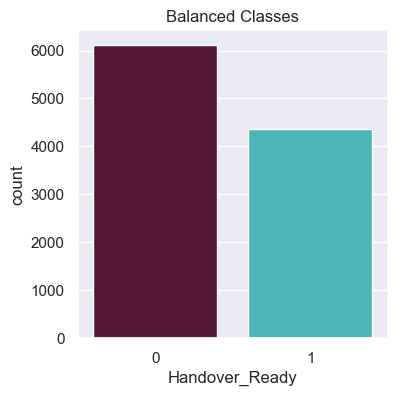

In [86]:
# Plot the dataset after the undersampling
plt.figure(figsize=(4, 4))
sns.countplot(x=classifier_UE_data['Handover_Ready'])
plt.title('Balanced Classes')
plt.show()

# Fix Imbalanced Dataset

In [87]:
# Shuffle the Dataset
shuffled_UE_data = classifier_UE_data.sample(frac=1, random_state=4)

In [88]:
# Put all the Ready class in a separate dataset
Ready = shuffled_UE_data.loc[shuffled_UE_data['Handover_Ready'] == 1]

In [89]:
# Randomly select 101196 observations from the Non Ready (majority Class)
Non_Ready = shuffled_UE_data.loc[shuffled_UE_data['Handover_Ready'] == 0].sample(n=5113, random_state=42)

In [90]:
# Concatenate both Dataframmes again
normalized_UE_data = pd.concat([Ready, Non_Ready])

In [91]:
normalized_UE_data

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance,Handover_Ready
174,29,0,-0.8174,-118.2951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.482638,1
5596,932,2,0.2645,-116.8199,0.000000,348.025410,-69.804192,321.957662,165.250743,165.250743,-135.250743,-135.250743,-90.567699,20,53.348396,38.296896,41.307196,0.001005,301.148013,-165.619198,267.600095,1
6884,1147,1,0.8936,-113.5446,38.798000,51.306250,-67.300050,326.258669,165.946384,165.946384,-135.946384,-135.946384,-91.263340,20,52.652754,37.601255,40.611555,0.001088,326.258669,-166.314840,295.451376,1
2138,356,1,1.0734,-114.0862,26.959424,23.117827,-67.304701,326.411462,165.950480,165.950480,-135.950480,-135.950480,-91.267435,20,52.648659,37.597160,40.607459,0.001089,326.412524,-166.318935,240.314872,1
7582,1263,2,-0.2442,-117.6874,0.000000,261.429909,-86.214339,301.883661,165.931963,165.931963,-135.931963,-135.931963,-91.248918,20,52.667176,37.615676,40.625976,0.001086,325.717414,-166.300418,378.968964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920,1320,0,0.2292,-115.1895,0.000000,67.572742,-76.494188,310.183084,166.369439,166.369439,-136.369439,-136.369439,-91.686394,20,52.229700,37.178200,40.188500,0.001143,342.542750,-166.737894,282.660632,0
1645,274,0,1.4565,-114.7034,37.930950,188.688657,-68.360623,324.963911,165.227379,165.227379,-135.227379,-135.227379,-90.544335,20,53.371760,38.320260,41.330560,0.001002,300.339051,-165.595835,389.358732,0
7603,1267,0,0.9230,-116.1523,11.748544,204.008595,-68.286687,325.398549,165.341583,165.341583,-135.341583,-135.341583,-90.658538,20,53.257556,38.206056,41.216356,0.001015,304.314030,-165.710038,225.258340,0
2219,369,2,0.4513,-114.6258,63.009638,137.063563,-66.525988,329.018035,167.332037,167.332037,-137.332037,-137.332037,-92.648992,20,51.267102,36.215602,39.225902,0.001277,382.687857,-167.700492,89.038743,0


In [92]:
normalized_UE_data['Handover_Ready'].value_counts()

0    5113
1    4364
Name: Handover_Ready, dtype: int64

In [93]:
#targets.sum() / targets.shape[0]
normalized_UE_data['Handover_Ready'].sum() / normalized_UE_data.shape[0]

0.46048327529809013

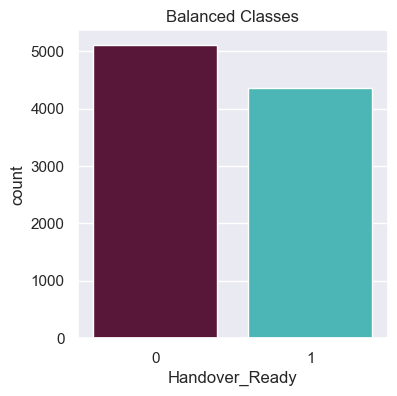

In [94]:
# Plot the dataset after the undersampling
plt.figure(figsize=(4, 4))
sns.countplot(x=normalized_UE_data['Handover_Ready'])
plt.title('Balanced Classes')
plt.show()

# Select the inputs for the Regression

In [95]:
inputs = normalized_UE_data.iloc[:, 0:21]
target = normalized_UE_data['Handover_Ready']

In [96]:
inputs

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance
174,29,0,-0.8174,-118.2951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.482638
5596,932,2,0.2645,-116.8199,0.000000,348.025410,-69.804192,321.957662,165.250743,165.250743,-135.250743,-135.250743,-90.567699,20,53.348396,38.296896,41.307196,0.001005,301.148013,-165.619198,267.600095
6884,1147,1,0.8936,-113.5446,38.798000,51.306250,-67.300050,326.258669,165.946384,165.946384,-135.946384,-135.946384,-91.263340,20,52.652754,37.601255,40.611555,0.001088,326.258669,-166.314840,295.451376
2138,356,1,1.0734,-114.0862,26.959424,23.117827,-67.304701,326.411462,165.950480,165.950480,-135.950480,-135.950480,-91.267435,20,52.648659,37.597160,40.607459,0.001089,326.412524,-166.318935,240.314872
7582,1263,2,-0.2442,-117.6874,0.000000,261.429909,-86.214339,301.883661,165.931963,165.931963,-135.931963,-135.931963,-91.248918,20,52.667176,37.615676,40.625976,0.001086,325.717414,-166.300418,378.968964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920,1320,0,0.2292,-115.1895,0.000000,67.572742,-76.494188,310.183084,166.369439,166.369439,-136.369439,-136.369439,-91.686394,20,52.229700,37.178200,40.188500,0.001143,342.542750,-166.737894,282.660632
1645,274,0,1.4565,-114.7034,37.930950,188.688657,-68.360623,324.963911,165.227379,165.227379,-135.227379,-135.227379,-90.544335,20,53.371760,38.320260,41.330560,0.001002,300.339051,-165.595835,389.358732
7603,1267,0,0.9230,-116.1523,11.748544,204.008595,-68.286687,325.398549,165.341583,165.341583,-135.341583,-135.341583,-90.658538,20,53.257556,38.206056,41.216356,0.001015,304.314030,-165.710038,225.258340
2219,369,2,0.4513,-114.6258,63.009638,137.063563,-66.525988,329.018035,167.332037,167.332037,-137.332037,-137.332037,-92.648992,20,51.267102,36.215602,39.225902,0.001277,382.687857,-167.700492,89.038743


In [97]:
target

174     1
5596    1
6884    1
2138    1
7582    1
       ..
7920    0
1645    0
7603    0
2219    0
1500    0
Name: Handover_Ready, Length: 9477, dtype: int32

# Standardize The Data

In [98]:
unscalled_inputs = normalized_UE_data.iloc[:,:-1]

In [99]:
unscalled_inputs

,Index,CellType,Latitude,Longitude,Time,Azimuth,Elevation,Range,Free Space Loss,Prop Loss,Rcvd. Iso. Power,Carrier Power at Rcvr Input,Flux Density,g/T,C/No,C/N,Eb/No,Propagation Delay,Propagation Distance,Spectral Flux Density,distance
174,29,0,-0.8174,-118.2951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.482638
5596,932,2,0.2645,-116.8199,0.000000,348.025410,-69.804192,321.957662,165.250743,165.250743,-135.250743,-135.250743,-90.567699,20,53.348396,38.296896,41.307196,0.001005,301.148013,-165.619198,267.600095
6884,1147,1,0.8936,-113.5446,38.798000,51.306250,-67.300050,326.258669,165.946384,165.946384,-135.946384,-135.946384,-91.263340,20,52.652754,37.601255,40.611555,0.001088,326.258669,-166.314840,295.451376
2138,356,1,1.0734,-114.0862,26.959424,23.117827,-67.304701,326.411462,165.950480,165.950480,-135.950480,-135.950480,-91.267435,20,52.648659,37.597160,40.607459,0.001089,326.412524,-166.318935,240.314872
7582,1263,2,-0.2442,-117.6874,0.000000,261.429909,-86.214339,301.883661,165.931963,165.931963,-135.931963,-135.931963,-91.248918,20,52.667176,37.615676,40.625976,0.001086,325.717414,-166.300418,378.968964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920,1320,0,0.2292,-115.1895,0.000000,67.572742,-76.494188,310.183084,166.369439,166.369439,-136.369439,-136.369439,-91.686394,20,52.229700,37.178200,40.188500,0.001143,342.542750,-166.737894,282.660632
1645,274,0,1.4565,-114.7034,37.930950,188.688657,-68.360623,324.963911,165.227379,165.227379,-135.227379,-135.227379,-90.544335,20,53.371760,38.320260,41.330560,0.001002,300.339051,-165.595835,389.358732
7603,1267,0,0.9230,-116.1523,11.748544,204.008595,-68.286687,325.398549,165.341583,165.341583,-135.341583,-135.341583,-90.658538,20,53.257556,38.206056,41.216356,0.001015,304.314030,-165.710038,225.258340
2219,369,2,0.4513,-114.6258,63.009638,137.063563,-66.525988,329.018035,167.332037,167.332037,-137.332037,-137.332037,-92.648992,20,51.267102,36.215602,39.225902,0.001277,382.687857,-167.700492,89.038743


In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
UE_date_scaler = StandardScaler()
UE_date_scaler.fit(unscalled_inputs)

StandardScaler()

In [102]:
scaled_inputs = UE_date_scaler.transform(unscalled_inputs)

In [103]:
scaled_inputs

array([[-1.67636995, -1.2455538 , -1.32678631, ..., -1.77132345,
         1.8068573 , -1.03580664],
       [ 0.1119958 ,  1.19507752, -0.15266243, ...,  0.28302462,
        -0.53932053,  0.46101368],
       [ 0.53779717, -0.02523814,  0.53006364, ...,  0.45432254,
        -0.54917505,  0.68743634],
       ...,
       [ 0.77545375, -1.2455538 ,  0.56196977, ...,  0.30462231,
        -0.54060737,  0.11678777],
       [-1.00300965,  1.19507752,  0.05006087, ...,  0.83926678,
        -0.56880434, -0.99063715],
       [-1.23868576, -1.2455538 , -1.18320872, ..., -1.77132345,
         1.8068573 , -1.04783933]])

In [104]:
scaled_inputs.shape

(9477, 21)

# Splitting The Data for Training and Testing

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
# Split 
train_test_split(scaled_inputs, target)

[array([[ 0.10803486,  1.19507752,  1.93990219, ...,  0.80374892,
         -0.56711878, -0.77811168],
        [ 0.76951233, -0.02523814,  1.66316535, ...,  0.45390864,
         -0.54915216, -0.23898764],
        [-0.35935642, -1.2455538 ,  0.27448903, ...,  0.32414038,
         -0.54175884, -0.20988793],
        ...,
        [-0.76733354, -0.02523814, -0.01255762, ...,  0.4555404 ,
         -0.54924236, -0.03503211],
        [ 1.4943649 , -0.02523814, -0.233513  , ...,  0.2959484 ,
         -0.54009217, -1.40536435],
        [ 1.37949755,  1.19507752,  0.71943846, ...,  0.35065797,
         -0.54330617, -0.09073864]]),
 array([[-1.25849047,  1.19507752,  1.74955066, ...,  0.76237104,
         -0.56512555, -0.63462424],
        [ 1.20719653, -0.02523814, -0.28169776, ...,  0.45461393,
         -0.54919116, -0.72254831],
        [ 1.34781001,  1.19507752, -0.63809141, ...,  0.88042472,
         -0.5707291 ,  0.12259772],
        ...,
        [-1.64270194,  1.19507752, -1.21565748, ...,  

In [107]:
x_train, X_test, y_train, y_test = train_test_split(scaled_inputs, target, train_size=0.8)

In [108]:
print(x_train.shape, y_train.shape)

(7581, 21) (7581,)


In [109]:
print(X_test.shape, y_test.shape)

(1896, 21) (1896,)


# Machine Learnong Model

# 1. Logistic regression

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [111]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [112]:
reg.score(x_train, y_train)

0.8708613639361562

In [113]:
start_time = time.time()

print("Shape of X train", x_train.shape)
print("Shape of y train", y_train.shape)

"""
Logistic Regression is one of the oldest and most basic algorithms to solve a classification problem:
"""
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

print("score on test: " + str(lr.score(X_test, y_test)))
print("score on train: "+ str(lr.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = lr.predict(X_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("---------------------------")
print("Evaluation : LOGISTIC REGRESSION")
print("---------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

Shape of X train (7581, 21)
Shape of y train (7581,)
score on test: 0.8744725738396625
score on train: 0.8708613639361562
Use the trained model to make predictions
[0 0 1 ... 0 1 1]
   
---------------------------
Evaluation : LOGISTIC REGRESSION
---------------------------
Accuracy:  0.8744725738396625
MSE:  0.12552742616033755
Precision: 0.88 / Recall: 0.84 
ROC AUC:  0.872048091233481
F1 score: 0.8742398111166759
   
Run time :  0.07299160957336426 seconds ---


# 2. Naive Bayes

In [114]:
start_time = time.time()

print("Shape of X train", x_train.shape)
print("Shape of y train", y_train.shape)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(X_test)


print("   ")
# Evaluate the predictions of the model on the holdout test set
print("---------------------------")
print("Evaluation : NAIVES BAYES")
print("---------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

Shape of X train (7581, 21)
Shape of y train (7581,)
   
---------------------------
Evaluation : NAIVES BAYES
---------------------------
Accuracy:  0.7172995780590717
MSE:  0.28270042194092826
Precision: 0.73 / Recall: 0.61 
ROC AUC:  0.7089960372249816
F1 score: 0.7139118345308754
   
Run time :  0.09499526023864746 seconds ---


# 3. k-nearest neighbors

In [115]:
start_time = time.time()
"""
The k-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm that can be used to solve both classification and regression problems.
"""
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(x_train, y_train)

print("train shape: " + str(x_train.shape))
print("score on test: " + str(knn.score(X_test, y_test)))
print("score on train: "+ str(knn.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = knn.predict(X_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("---------------------------")
print("Evaluation : K-NEAREST NEIGHBOURS")
print("---------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

train shape: (7581, 21)
score on test: 0.9757383966244726
score on train: 0.9885239414325286
Use the trained model to make predictions
[0 0 1 ... 0 0 1]
   
---------------------------
Evaluation : K-NEAREST NEIGHBOURS
---------------------------
Accuracy:  0.9757383966244726
MSE:  0.024261603375527425
Precision: 0.97 / Recall: 0.98 
ROC AUC:  0.9759230038193262
F1 score: 0.9757466565596813
   
Run time :  0.4329972267150879 seconds ---


# 4. Support Vector Machine

In [116]:
start_time = time.time()

"""
The Support Vector Machine is a simple algorithm for classification and regression tasks. It can provide high accuracy with less computation power very fast. Due to the large number of features, we are using the LinearSVC. It turned out that setting the regularisation parameter C=0.0001 improves the quality of the prediction and reduces overfitting.
"""
from sklearn.svm import LinearSVC

svm=LinearSVC(C=0.0001)
svm.fit(x_train, y_train)

print("score on test: " + str(svm.score(X_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = svm.predict(X_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("-----------------------------------")
print("Evaluation : SUPPORT VECTOR MACHINE")
print("-----------------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

score on test: 0.8438818565400844
score on train: 0.8388075451787363
Use the trained model to make predictions
[0 0 1 ... 0 0 1]
   
-----------------------------------
Evaluation : SUPPORT VECTOR MACHINE
-----------------------------------
Accuracy:  0.8438818565400844
MSE:  0.15611814345991562
Precision: 0.93 / Recall: 0.71 
ROC AUC:  0.8337965536409117
F1 score: 0.8406380453810935
   
Run time :  0.026999711990356445 seconds ---


# 5. Decision Tree

In [117]:
start_time = time.time()

"""
A Decision Tree is a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules (if-else) inferred from the data features.
"""
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("   ")
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = clf.predict(X_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("---------------------------")
print("Evaluation : DECISION TREE")
print("---------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

   
score on test: 0.995253164556962
score on train: 1.0
Use the trained model to make predictions
[0 0 1 ... 0 0 1]
   
---------------------------
Evaluation : DECISION TREE
---------------------------
Accuracy:  0.995253164556962
MSE:  0.004746835443037975
Precision: 1.0 / Recall: 0.99 
ROC AUC:  0.9950846348329717
F1 score: 0.9952525140407473
   
Run time :  0.05699491500854492 seconds ---


# 6. Bagging Decision Tree

In [118]:
start_time = time.time()

"""
When a decision tree overfits, applying an ensemble learning algorithm like bagging might improve the quality of the prediction model. In bagging, the training data is increased by taking bootstraps from the training data. This means multiple samples are taken (with replacement) from the training data and the model is trained on these sub-datasets. The final prediction is the average over all predictions from each bootstrap sample.
"""
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(x_train, y_train)

print("score on test: " + str(bg.score(X_test, y_test)))
print("score on train: "+ str(bg.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = bg.predict(X_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("----------------------------------")
print("Evaluation : BAGGING DECISION TREE")
print("----------------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

score on test: 0.9936708860759493
score on train: 0.9989447302466693
Use the trained model to make predictions
[0 0 1 ... 0 0 1]
   
----------------------------------
Evaluation : BAGGING DECISION TREE
----------------------------------
Accuracy:  0.9936708860759493
MSE:  0.006329113924050633
Precision: 0.99 / Recall: 0.99 
ROC AUC:  0.9935358353206979
F1 score: 0.9936703114391165
   
Run time :  0.2759981155395508 seconds ---


# 7. Boosting Decision Tree

In [119]:
start_time = time.time()

"""
In general, we can’t use Boosting to improve a completely overfitted model with score = 1. To apply Boosting, we first have to tweak the decision tree classifier a bit. It took me some trial and error until I got the best parameters for the Decision Tree and the AdaBoost Classifier. I am sure you can further improve by playing around a bit more.
"""
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(x_train, y_train)

print("score on test: " + str(adb.score(X_test, y_test)))
print("score on train: "+ str(adb.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = adb.predict(X_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("-----------------------------------")
print("Evaluation : BOOSTING DECISION TREE")
print("-----------------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

score on test: 0.9973628691983122
score on train: 1.0
Use the trained model to make predictions
[0 0 1 ... 0 0 1]
   
-----------------------------------
Evaluation : BOOSTING DECISION TREE
-----------------------------------
Accuracy:  0.9973628691983122
MSE:  0.0026371308016877636
Precision: 1.0 / Recall: 1.0 
ROC AUC:  0.9973887822984095
F1 score: 0.9973629866656568
   
Run time :  0.4639923572540283 seconds ---


# 8. Random Forest

In [120]:
start_time = time.time()

"""
The Random Forest Algorithm is another frequently used ensemble learning classifier which uses multiple decision trees. 
The Random Forest classifier is basically a modified bagging algorithm of a Decision Tree that selects the subsets differently. 
+++I found out that max_depth=9 is a good value for this feature-rich dataset
"""
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train, y_train)

print("score on test: " + str(rf.score(X_test, y_test)))
print("score on train: "+ str(rf.score(x_train, y_train)))

# Use the trained model to make predictions
print("Use the trained model to make predictions")
y_pred = rf.predict(X_test)
print(y_pred)

print("   ")
# Evaluate the predictions of the model on the holdout test set
print("--------------------------")
print("Evaluation : RANDOM FOREST")
print("--------------------------")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred)))
print("   ")

print("Run time :  %s seconds ---" % (time.time() - start_time))

score on test: 0.9936708860759493
score on train: 1.0
Use the trained model to make predictions
[0 0 1 ... 0 0 1]
   
--------------------------
Evaluation : RANDOM FOREST
--------------------------
Accuracy:  0.9936708860759493
MSE:  0.006329113924050633
Precision: 0.99 / Recall: 0.99 
ROC AUC:  0.9936254908641001
F1 score: 0.9936708860759493
   
Run time :  0.31655311584472656 seconds ---


# Feature importance

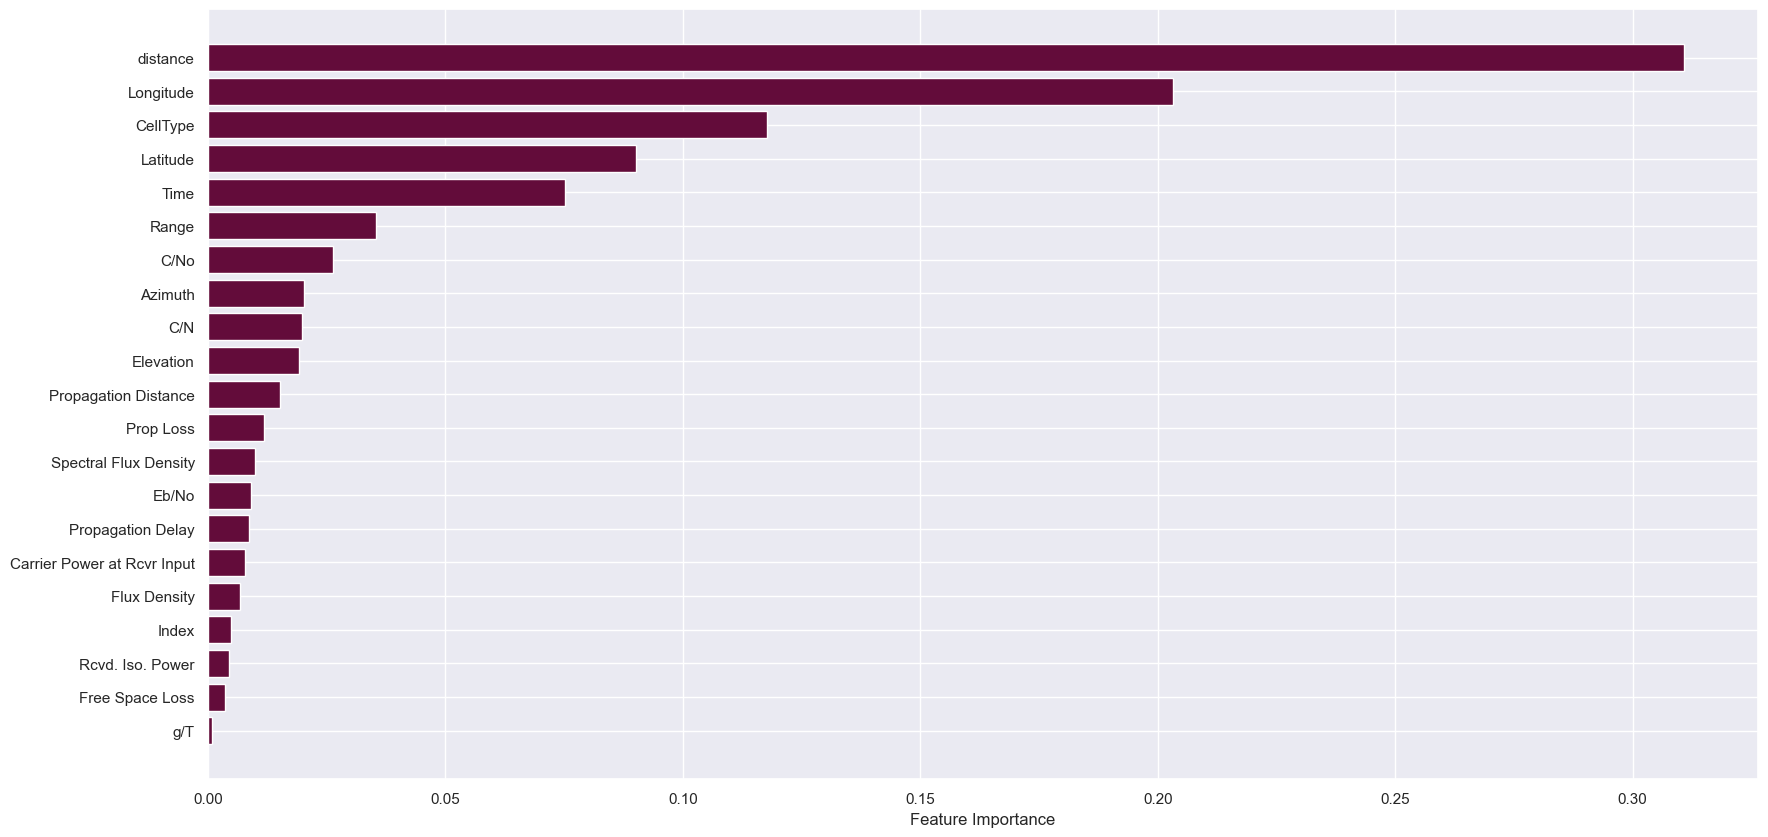

In [121]:
sort = rf.feature_importances_.argsort()
plt.barh(classifier_UE_data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.savefig('Feature_Importance.png')
plt.savefig('Feature_Importance.jpeg')

# Correlation Matrix

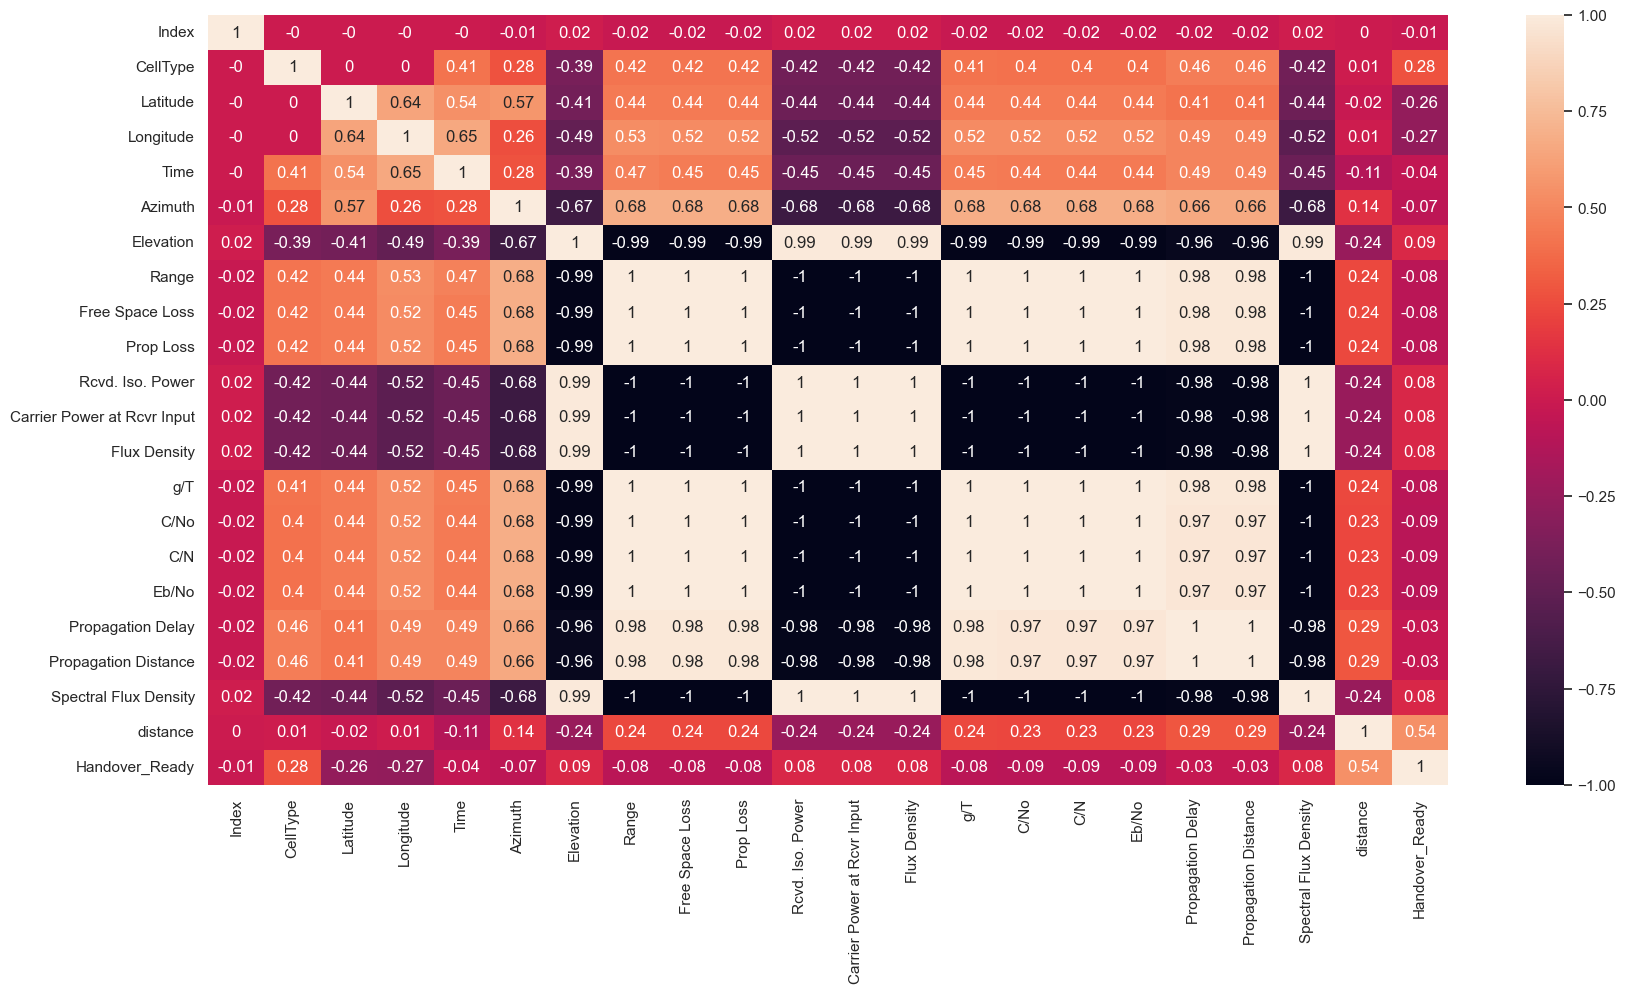

<Figure size 2000x1000 with 0 Axes>

In [122]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


matrix = classifier_UE_data.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
plt.savefig('CorrelationMatrix.png')

# 2. Neural Network

In [123]:
# METRICS : taken from old keras source code
def f1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [124]:
# Learning model parameters
epochs = 75
batch_size = 15
dr = 0.1 

In [125]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=21))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
#classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier.compile(optimizer ='adam', loss='binary_crossentropy', metrics =METRICS)
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 88        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [126]:
start_time = time.time()
#Fitting the data to the training dataset
history =classifier.fit(x_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))
print("Run time :  %s seconds ---" % (time.time() - start_time))

Epoch 1/75
506/506 [==============================] - 3s 3ms/step - loss: 0.5549 - accuracy: 0.7372 - precision: 0.7410 - recall: 0.6613 - auc: 0.8358 - f1_score: 0.6715 - val_loss: 0.3121 - val_accuracy: 0.9030 - val_precision: 0.9212 - val_recall: 0.8618 - val_auc: 0.9608 - val_f1_score: 0.8851
Epoch 2/75
506/506 [==============================] - 1s 2ms/step - loss: 0.2438 - accuracy: 0.9210 - precision: 0.9222 - recall: 0.9050 - auc: 0.9712 - f1_score: 0.9016 - val_loss: 0.2184 - val_accuracy: 0.9214 - val_precision: 0.9379 - val_recall: 0.8871 - val_auc: 0.9711 - val_f1_score: 0.9055
Epoch 3/75
506/506 [==============================] - 1s 2ms/step - loss: 0.1943 - accuracy: 0.9323 - precision: 0.9307 - recall: 0.9219 - auc: 0.9781 - f1_score: 0.9185 - val_loss: 0.1952 - val_accuracy: 0.9293 - val_precision: 0.9297 - val_recall: 0.9147 - val_auc: 0.9750 - val_f1_score: 0.9179
Epoch 4/75
506/506 [==============================] - 1s 2ms/step - loss: 0.1781 - accuracy: 0.9348 - prec

506/506 [==============================] - 1s 2ms/step - loss: 0.1465 - accuracy: 0.9429 - precision: 0.9422 - recall: 0.9334 - auc: 0.9865 - f1_score: 0.9335 - val_loss: 0.1696 - val_accuracy: 0.9372 - val_precision: 0.9442 - val_recall: 0.9171 - val_auc: 0.9815 - val_f1_score: 0.9249
Epoch 56/75
506/506 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9451 - precision: 0.9469 - recall: 0.9334 - auc: 0.9865 - f1_score: 0.9347 - val_loss: 0.1738 - val_accuracy: 0.9335 - val_precision: 0.9216 - val_recall: 0.9343 - val_auc: 0.9812 - val_f1_score: 0.9227
Epoch 57/75
506/506 [==============================] - 1s 2ms/step - loss: 0.1456 - accuracy: 0.9453 - precision: 0.9443 - recall: 0.9365 - auc: 0.9865 - f1_score: 0.9345 - val_loss: 0.1734 - val_accuracy: 0.9367 - val_precision: 0.9231 - val_recall: 0.9401 - val_auc: 0.9813 - val_f1_score: 0.9254
Epoch 58/75
506/506 [==============================] - 1s 2ms/step - loss: 0.1458 - accuracy: 0.9435 - precision: 0

In [127]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

237/237 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9445 - precision: 0.9453 - recall: 0.9336 - auc: 0.9868 - f1_score: 0.9374


[0.14463545382022858,
 0.9444664120674133,
 0.945264995098114,
 0.9336384534835815,
 0.9867633581161499,
 0.9373891949653625]

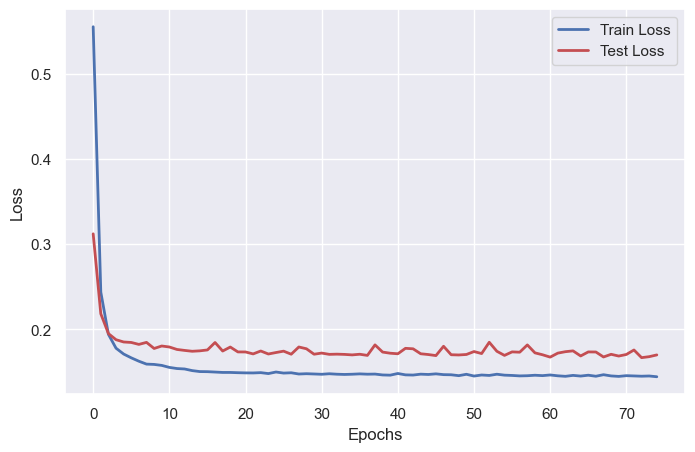

In [128]:
# Check how loss & mse went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_mae = history.history['accuracy']
epoch_val_mae = history.history['val_accuracy']

plt.figure(figsize=(8,5))
plt.plot(range(0,len(epoch_loss)), epoch_loss, 'b-', linewidth=2, label='Train Loss')
plt.plot(range(0,len(epoch_val_loss)), epoch_val_loss, 'r-', linewidth=2, label='Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

#lt.title('Loss')
plt.legend(loc='best')
plt.savefig('Figure_14_Loss.png')
plt.savefig('Figure_14_Loss.jpeg')
plt.show()



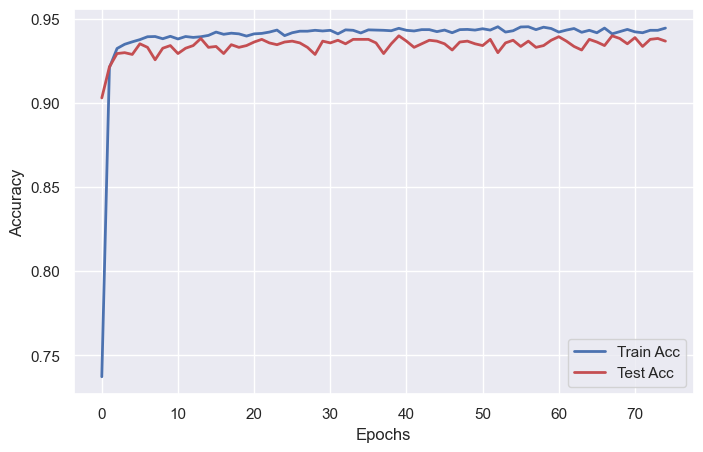

In [129]:
# Check how loss & mse went down
epoch_loss = history.history['loss']
epoch_val_loss = history.history['val_loss']
epoch_mae = history.history['accuracy']
epoch_val_mae = history.history['val_accuracy']

plt.figure(figsize=(8,5))

plt.plot(range(0,len(epoch_mae)), epoch_mae, 'b-', linewidth=2, label='Train Acc')
plt.plot(range(0,len(epoch_val_mae)), epoch_val_mae, 'r-', linewidth=2,label='Test Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.title('Accuracy')
plt.legend(loc='lower right')

plt.savefig('Figure_14_Acc.png')
plt.savefig('Figure_14_Acc.jpeg')
plt.show()

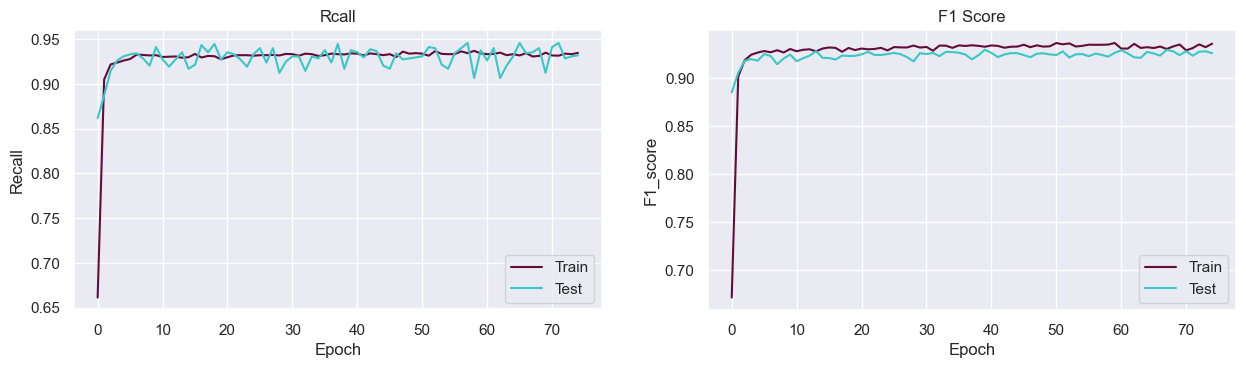

In [130]:
plot = 0
def plot_history(history):
    plt.figure(1, figsize = (15,8))
    plt.subplot(221)
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('Rcall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    #plt.legend(loc='best')
    plt.subplot(222)
    plt.plot(history.history['f1_score'])
    plt.plot(history.history['val_f1_score'])
    plt.title('F1 Score')
    plt.ylabel('F1_score')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plot = 0
    plt.savefig('Recall_F1-Score_'+str(plot)+'.pdf')
    plt.savefig('Recall_F1-Score_'+str(plot)+'.png')
    plot = plot + 1
    plt.show()
        
  # plot the model accuracy and loss results
plot_history(history)

In [131]:
y_pred_nn=classifier.predict(X_test)
y_pred_nn = (y_pred_nn>0.5)

60/60 [==============================] - 0s 1ms/step


In [132]:
y_pred_nn

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_nn)
print(cm)

[[967  61]
 [ 59 809]]


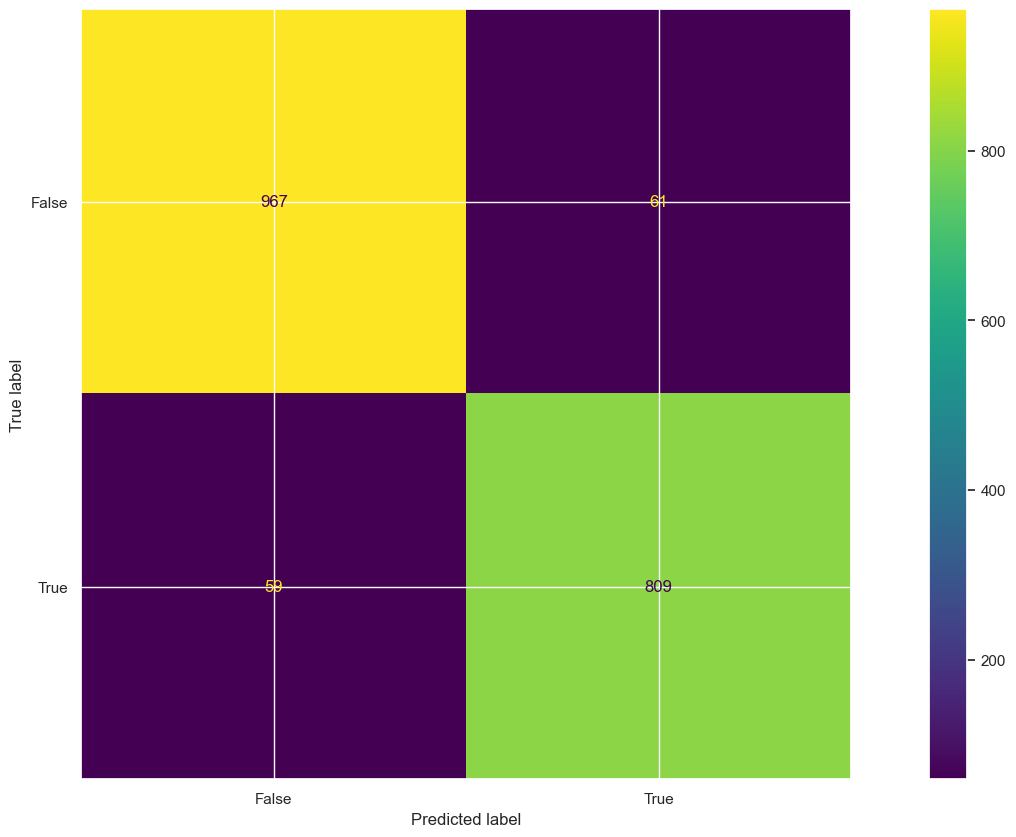

In [134]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_nn)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [135]:
print("Accuracy: ", accuracy_score(y_test, y_pred_nn))
print("MSE: ", mean_squared_error(y_test, y_pred_nn))
print("Precision: {} / Recall: {} ".format(round(precision, 2), round(recall, 2)))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_nn))
print("F1 score:", metrics.f1_score(y_test, y_pred_nn, average='weighted', labels=np.unique(y_pred_nn)))
print("   ")

Accuracy:  0.9367088607594937
MSE:  0.06329113924050633
Precision: 0.99 / Recall: 0.99 
ROC AUC:  0.9363445641844036
F1 score: 0.9367144632326496
   
